# **Project Name** -Earthquake Damage prediction. 

##### **Project Type**    - classification.
##### **Contribution**    - 3 people.
##### **Member Name -** Ashwini Shindalkar , Vaibhavi Deshpande, Nishant Pardeshi.
##### **Task -** 3

# **Project Summary**-

**Objective:** Develop a Machine Learning Model for Earthquake Damage Prediction.

**Why Earthquake Damage Prediction?**
Earthquakes can cause significant destruction to buildings, leading to economic losses and safety risks. Predicting the extent of damage to buildings based on various factors helps prioritize resources, improve disaster management, and enhance structural resilience.

**Key Tasks:**

**Data Collection:**
Gather data on building characteristics (e.g., age, height, material) and external factors (e.g., earthquake magnitude, proximity to the epicenter).
The damage_grade column serves as the output variable, typically categorized into discrete levels such as:
1: low damage
2: medium damage
3: high damage

**Data Preprocessing:**
Clean the dataset by handling missing values, outliers, and inconsistent records.
Normalize or scale numerical features for better model performance.
Encode categorical features into numerical representations.

**Feature Engineering:**
Identify significant features influencing building damage, such as material strength, design type, soil quality, and seismic activity.

**Model Building:**
Develop a classification model to predict the damage_grade.
Use algorithms such as Random Forest, Gradient Boosting, or Neural Networks, depending on dataset complexity.

**Model Evaluation:**
Assess the model using metrics like accuracy, precision, recall, F1-score, and confusion matrix.
Perform cross-validation to ensure model robustness.

**Deployment:**
Create a user-friendly application to input building characteristics and predict the potential damage grade.

**Benefits:**

**Preparedness:** Improved resource allocation for disaster mitigation.

**Safety:** Better insights for structural engineering improvements in earthquake-prone areas.

**Cost-Efficiency:** Prioritization of retrofitting and reconstruction efforts.

By completing this project, you'll gain a deeper understanding of classification models, disaster risk analysis, and feature engineering tailored to real-world scenarios.

## **BUSINESS CASE** -

<span style="font-family: Arial, sans-serif; font-size: 14px; color: black;">The dataset contains the survey results of one of the largest post-disaster data ever collected by the Central Bureau of Statistics. The data contains valuable information on the impact of earthquakes, household conditions, and socio-economic-demographic details. The target is to predict the level of damage to buildings caused by the earthquake.</span>

**Key Objectives:**
- Task 1:-Prepare a complete data analysis report on the given data.

- Task 2:-Create a predictive model in such a way that the objective is to predict the 
ordinal variable “damage_grade”. This column presents the level of damage grade 
affected by the earthquake.

- Task 3:-Suggestions to the Seismologists to avoid  earthquake event leading  to 
significant damage in many buildings.



## ***Let's Begin !***

### **1.Domain Analysis**

....importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


....loading data

In [2]:
input_data=pd.read_csv("train_values.csv")
output_data=pd.read_csv("train_labels.csv")

#### **Basic checks.**

In [3]:
input_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
output_data.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


#### **Observations**-


"In this project, the datasets were merged to ensure proper alignment of input features and output labels. The first dataset contains building attributes, such as area, age, and structural details etc, while the second dataset provides the earthquake damage grade for each building, linked through a unique building_id. Merging these datasets is essential to combine complementary information, enabling the creation of a unified dataset for predictive modeling. This process ensures that building characteristics are correctly matched with their corresponding damage grades, facilitating a more accurate analysis and prediction of earthquake damage severity."



#### **Merge datasets.**


In [5]:
combined_data=pd.merge(input_data,output_data,on='building_id',how='inner')

#### **Basic checks**

#### first five rows

In [6]:
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


#### Last five rows

In [7]:
combined_data.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,3


In [8]:
combined_data.shape

(260601, 40)

#### **Observation about Data** -

* there is the  260601 rows and  40 columns prasent in the above Dataset.

* Based on the given attributes, it's reasonable to assume that the 'damage_grade' column is the output or target variable. This is because it represents the severity of damage caused by an earthquake, which is often the primary focus of analysis in earthquake prediction studies.

#### duplicate values

In [9]:
duplicated_values_count= len(combined_data[combined_data.duplicated()])
print("Number of duplicated values:",duplicated_values_count)

Number of duplicated values: 0


#### Null values

In [ ]:
custom_nulls = ["?", " ", "", "NA", "N/A", "null", "Null", "nan", "NaN"]
combined_data.replace(custom_nulls, pd.NA, inplace=True)

print("Null values count per column:")
print(combined_data.isnull().sum())

if combined_data.isnull().values.any():
    print("The dataset contains null or custom null values.")
else:
    print("No null or custom null values in the dataset.")


In [11]:

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

#### **Observations**-

* Total attributes=40
   , 32 int
   , 8 object.
  
* No duplicate value prasent in the dataset.

* No null or custom null values in the dataset.


### ***2. Understanding The Variables***

In [12]:
combined_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

#statistical information about data.....

In [13]:
combined_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


#### **Observations**-

* The dataset contains 260,601 records, with each record representing a building.
* Building age varies widely, with an average of 26.5 years and a maximum of 995 years.
* Area and height percentages provide relative dimensions, averaging 8% and 5.4%, respectively.
* Binary columns (e.g., "has_superstructure_*") indicate the presence of specific materials, with values between 0 and 1,     * highlighting construction types like adobe mud, stone, or cement mortar.
* Superstructure materials include a mix of traditional (e.g., mud mortar brick, bamboo) and modern (e.g., reinforced * * * * concrete) options, with timber being the most commonly used material (25.5%).
* Secondary use of buildings is uncommon, occurring in about 11% of cases, with agriculture being the most frequent secondary use (6.4%).
* Secondary uses like hotels (3.3%) and rentals (0.8%) highlight diverse utilization of buildings, though these are less frequent.
* An "other" secondary use category accounts for 0.5% of the cases.
* average damage grade is 2.23.


## ***3.Exploratory Data Analysis***

### Univariate analysis.

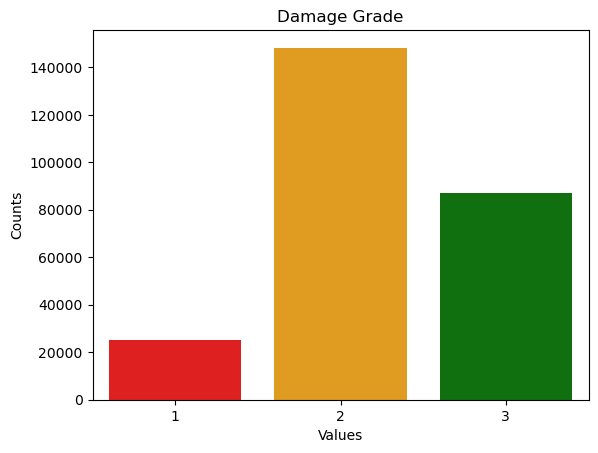

In [14]:
sns.countplot(x='damage_grade', data=combined_data, palette=['red', 'orange', 'green'])  
plt.xlabel('Values')  
plt.ylabel('Counts')
plt.title('Damage Grade') 
plt.show()


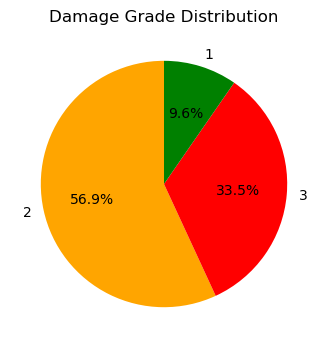

In [15]:

damage_counts = combined_data['damage_grade'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%', colors=['orange', 'red', 'green'], startangle=90)
plt.title('Damage Grade Distribution')
plt.show()

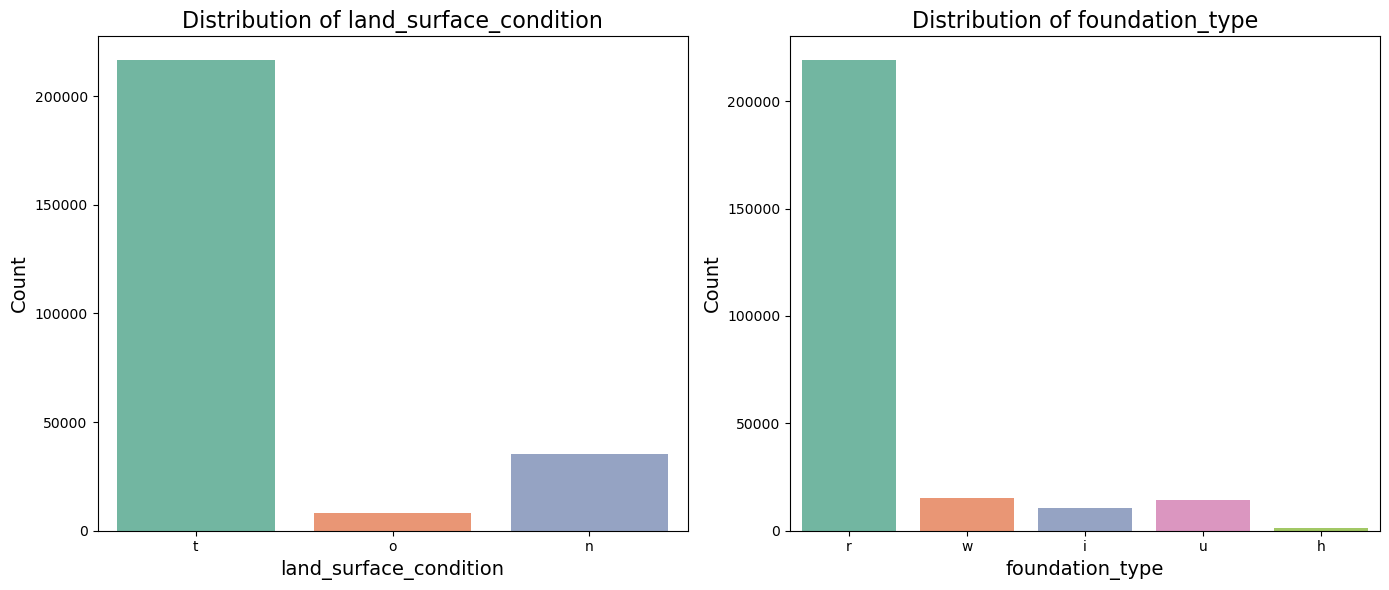

In [16]:
columns = ['land_surface_condition', 'foundation_type']
plt.figure(figsize=(14, 6), facecolor='white')
for i, col in enumerate(columns, 1):
    plt.subplot(1, 2, i)  # 1 row and 2 columns
    sns.countplot(x=col, data=combined_data, palette='Set2')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)

plt.tight_layout()  
plt.show()

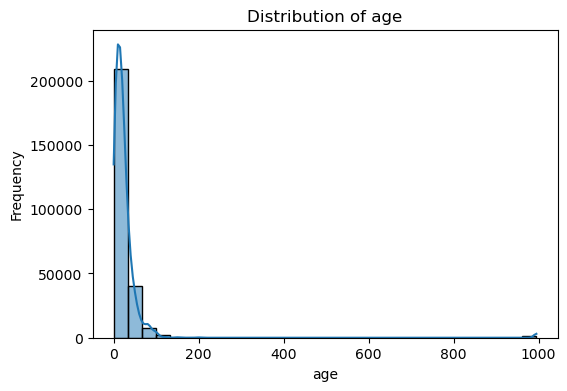

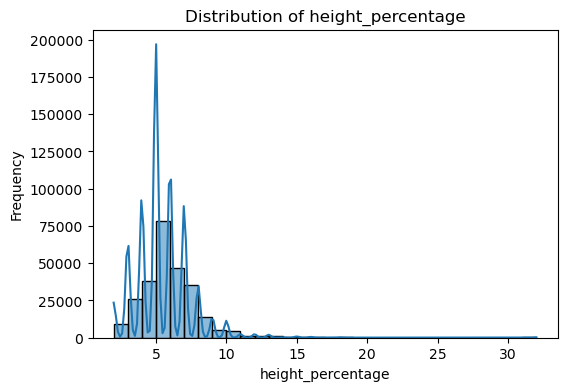

In [17]:
columns = [ 'age', 'height_percentage']

# Loop through each column and plot the histogram
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(combined_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### What is/are the insight(s) found from the charts?


- Damage category 2 is higher then 1 & 3 means  medium amount of damage is more .
- land surface type "t" is more frequent and 
- foundation type "r" is the most frequent.
- This data imabalance could impact model trainning.
- The age distribution is heavily skewed towards younger ages, with possible outliers at higher values.
- The height_percentage distribution is concentrated around 5%, with a steep decline as values increase, suggesting most data falls within a narrow range.
- The graph shows minor outliers beyond 10%, indicating potential anomalies in the data.

### Bivariate analysis.

## Checking relationship of all variables with respect to target variable 

#### **Binary columns**

##### Create new dataframe for binary columns only.

In [18]:
binary_columns =combined_data[ [
    'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered', 'has_superstructure_other', 'has_secondary_use',
    'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental',
    'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry',
    'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police',
    'has_secondary_use_other'
]]


In [19]:
binary_columns.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


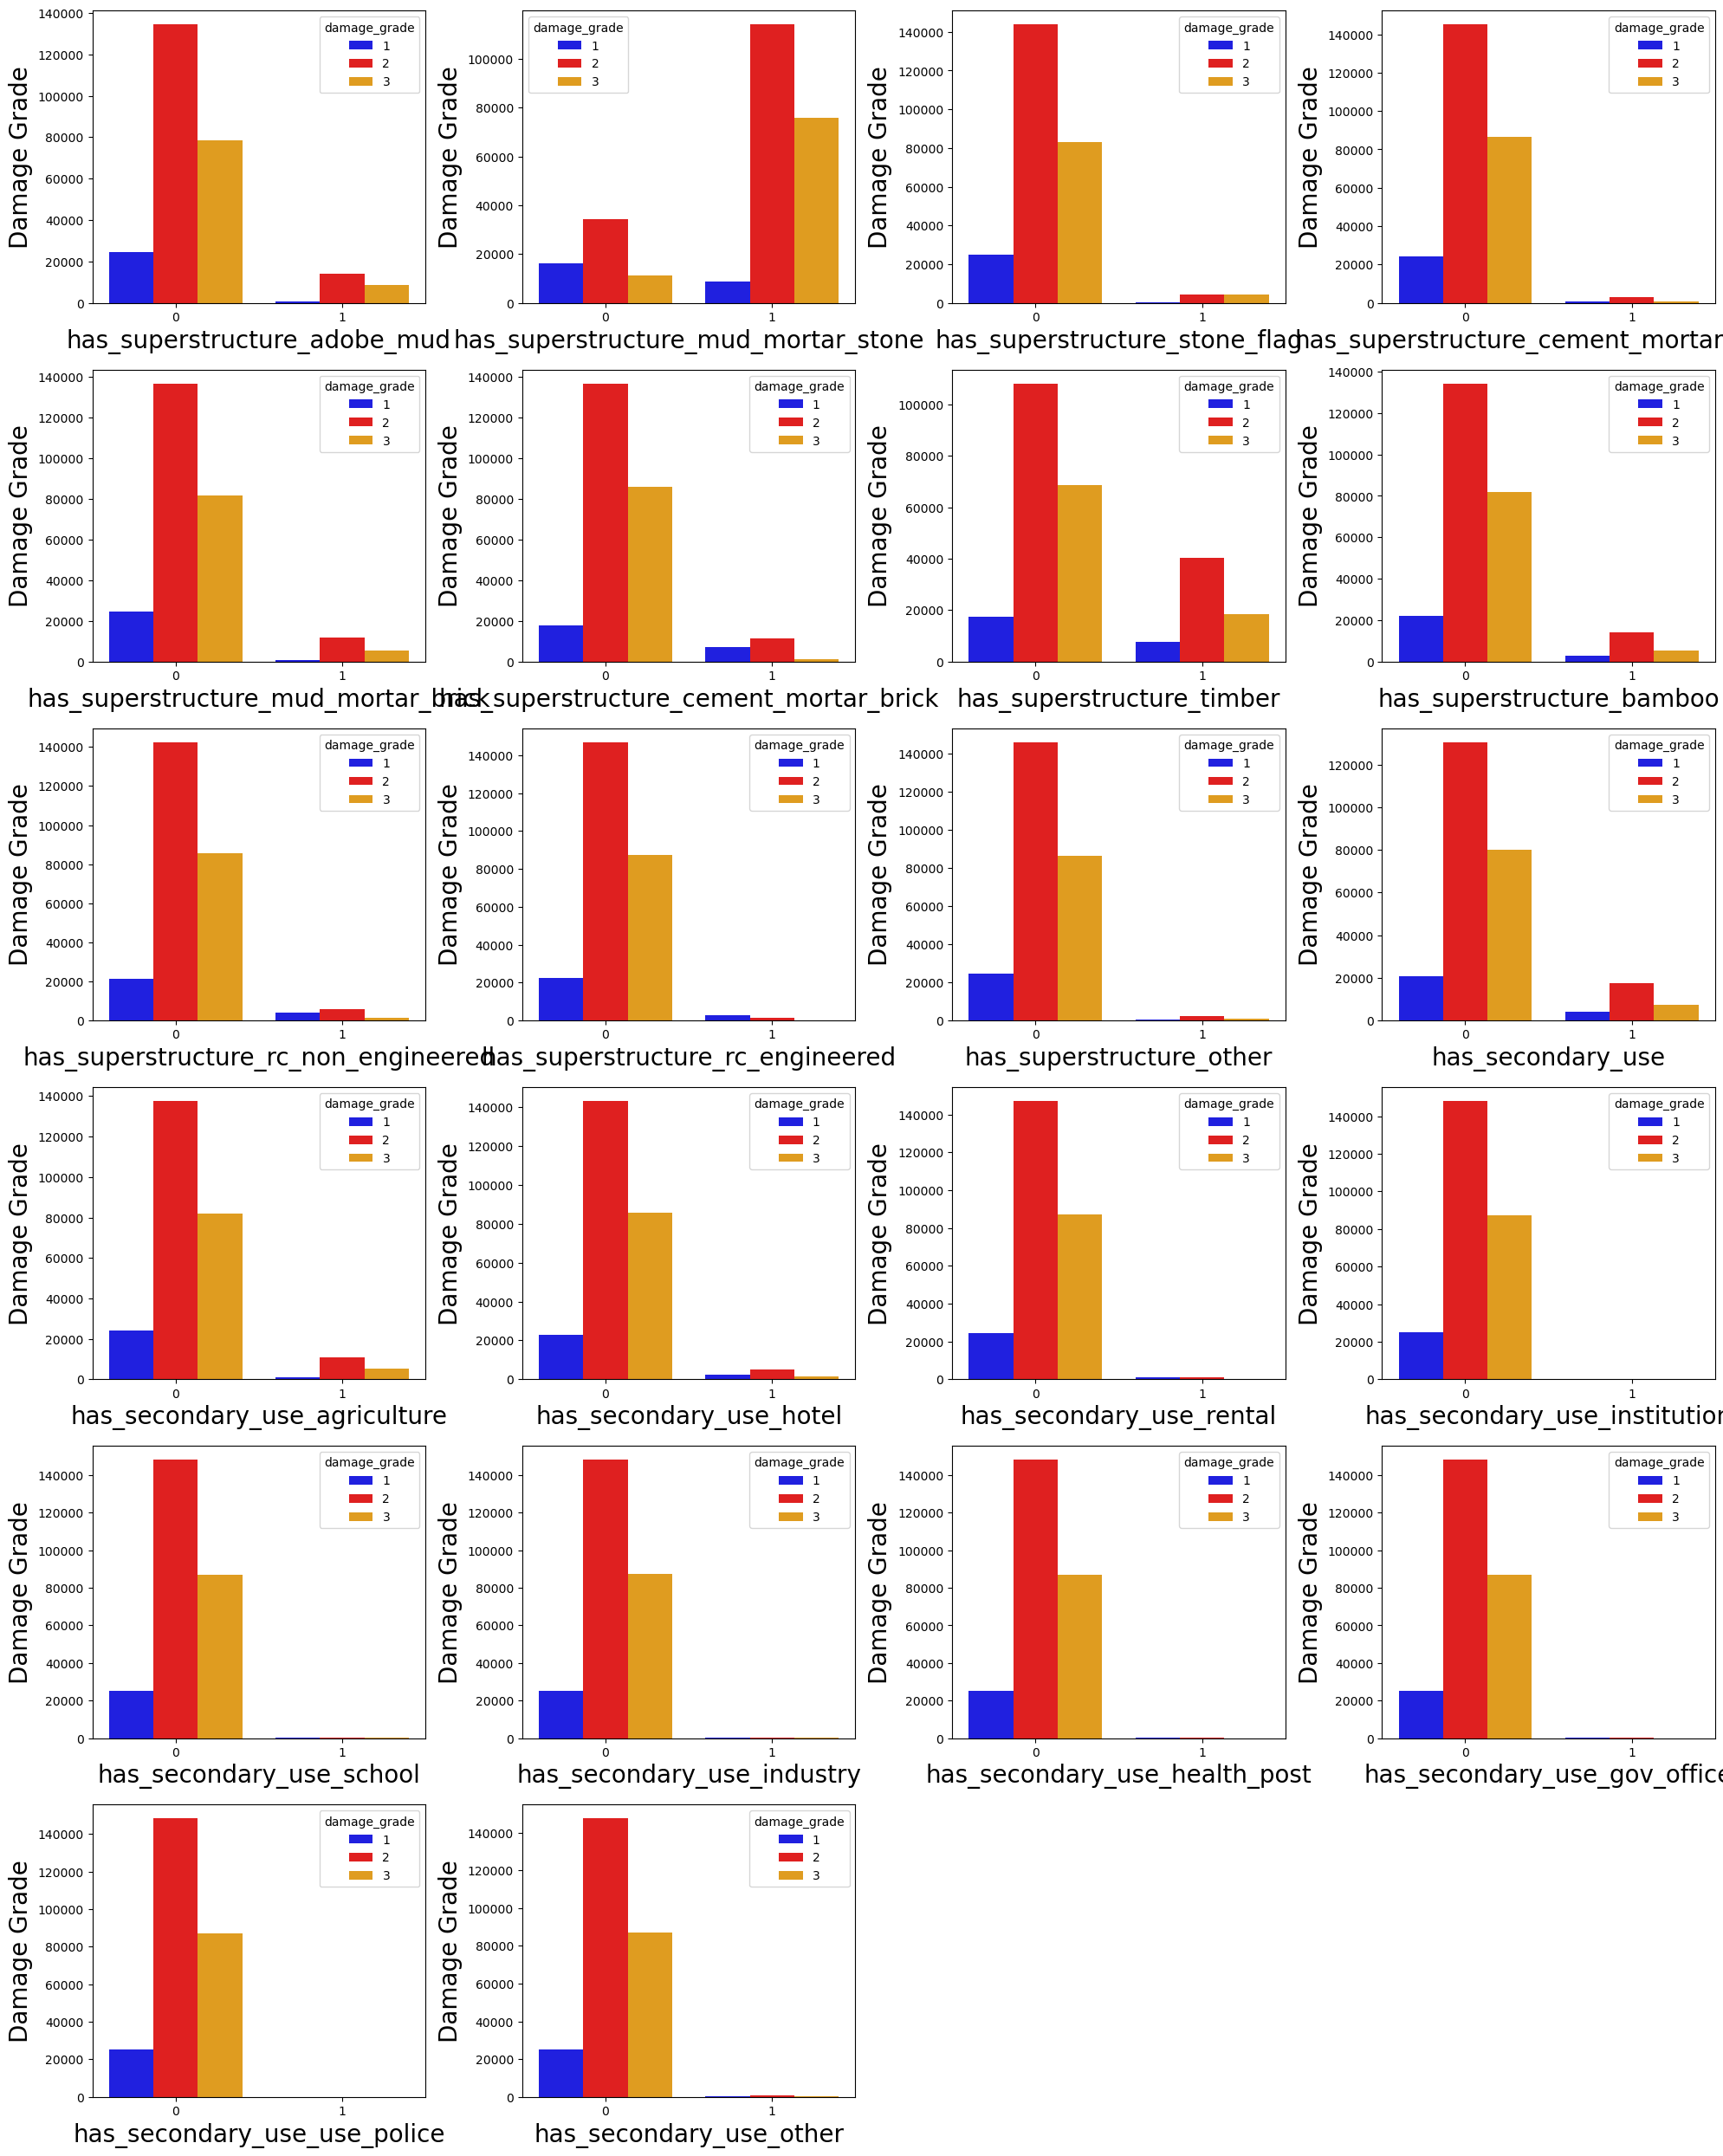

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25), facecolor='white') 
plotnumber = 1

for column in binary_columns:
    if plotnumber <= 22:
        ax = plt.subplot(6, 4, plotnumber)
        sns.countplot(
            x=binary_columns[column].dropna(axis=0), 
            hue=combined_data.damage_grade,
            palette=['blue', 'red', 'orange']  
        )
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Damage Grade', fontsize=20)
    plotnumber += 1

plt.tight_layout()  
plt.show()


##### What is/are the insight(s) found from the charts?


- Structures with adobe mud experience medium damage, while structures without adobe mud experience high damage.
- Mud-mortar stone structures mostly face medium damage, whereas structures without it experience high damage.
- Structures with stone flags show high damage, while those without experience medium damage.
- Cement mortar structures experience low to medium damage, while structures without it experience high damage.
- Timber structures experience medium damage, while those without timber experience high damage.
- Bamboo structures experience low damage, while those without bamboo  experience high damage.

#### **Integer columns**

##### 
Create new dataframe for Numerical columns only.

In [21]:
integer_columns = combined_data[[
    'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 
     'age', 'area_percentage', 'height_percentage','count_families'
]]


In [22]:
integer_columns.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
0,6,487,12198,2,30,6,5,1
1,8,900,2812,2,10,8,7,1
2,21,363,8973,2,10,5,5,1
3,22,418,10694,2,10,6,5,1
4,11,131,1488,3,30,8,9,1


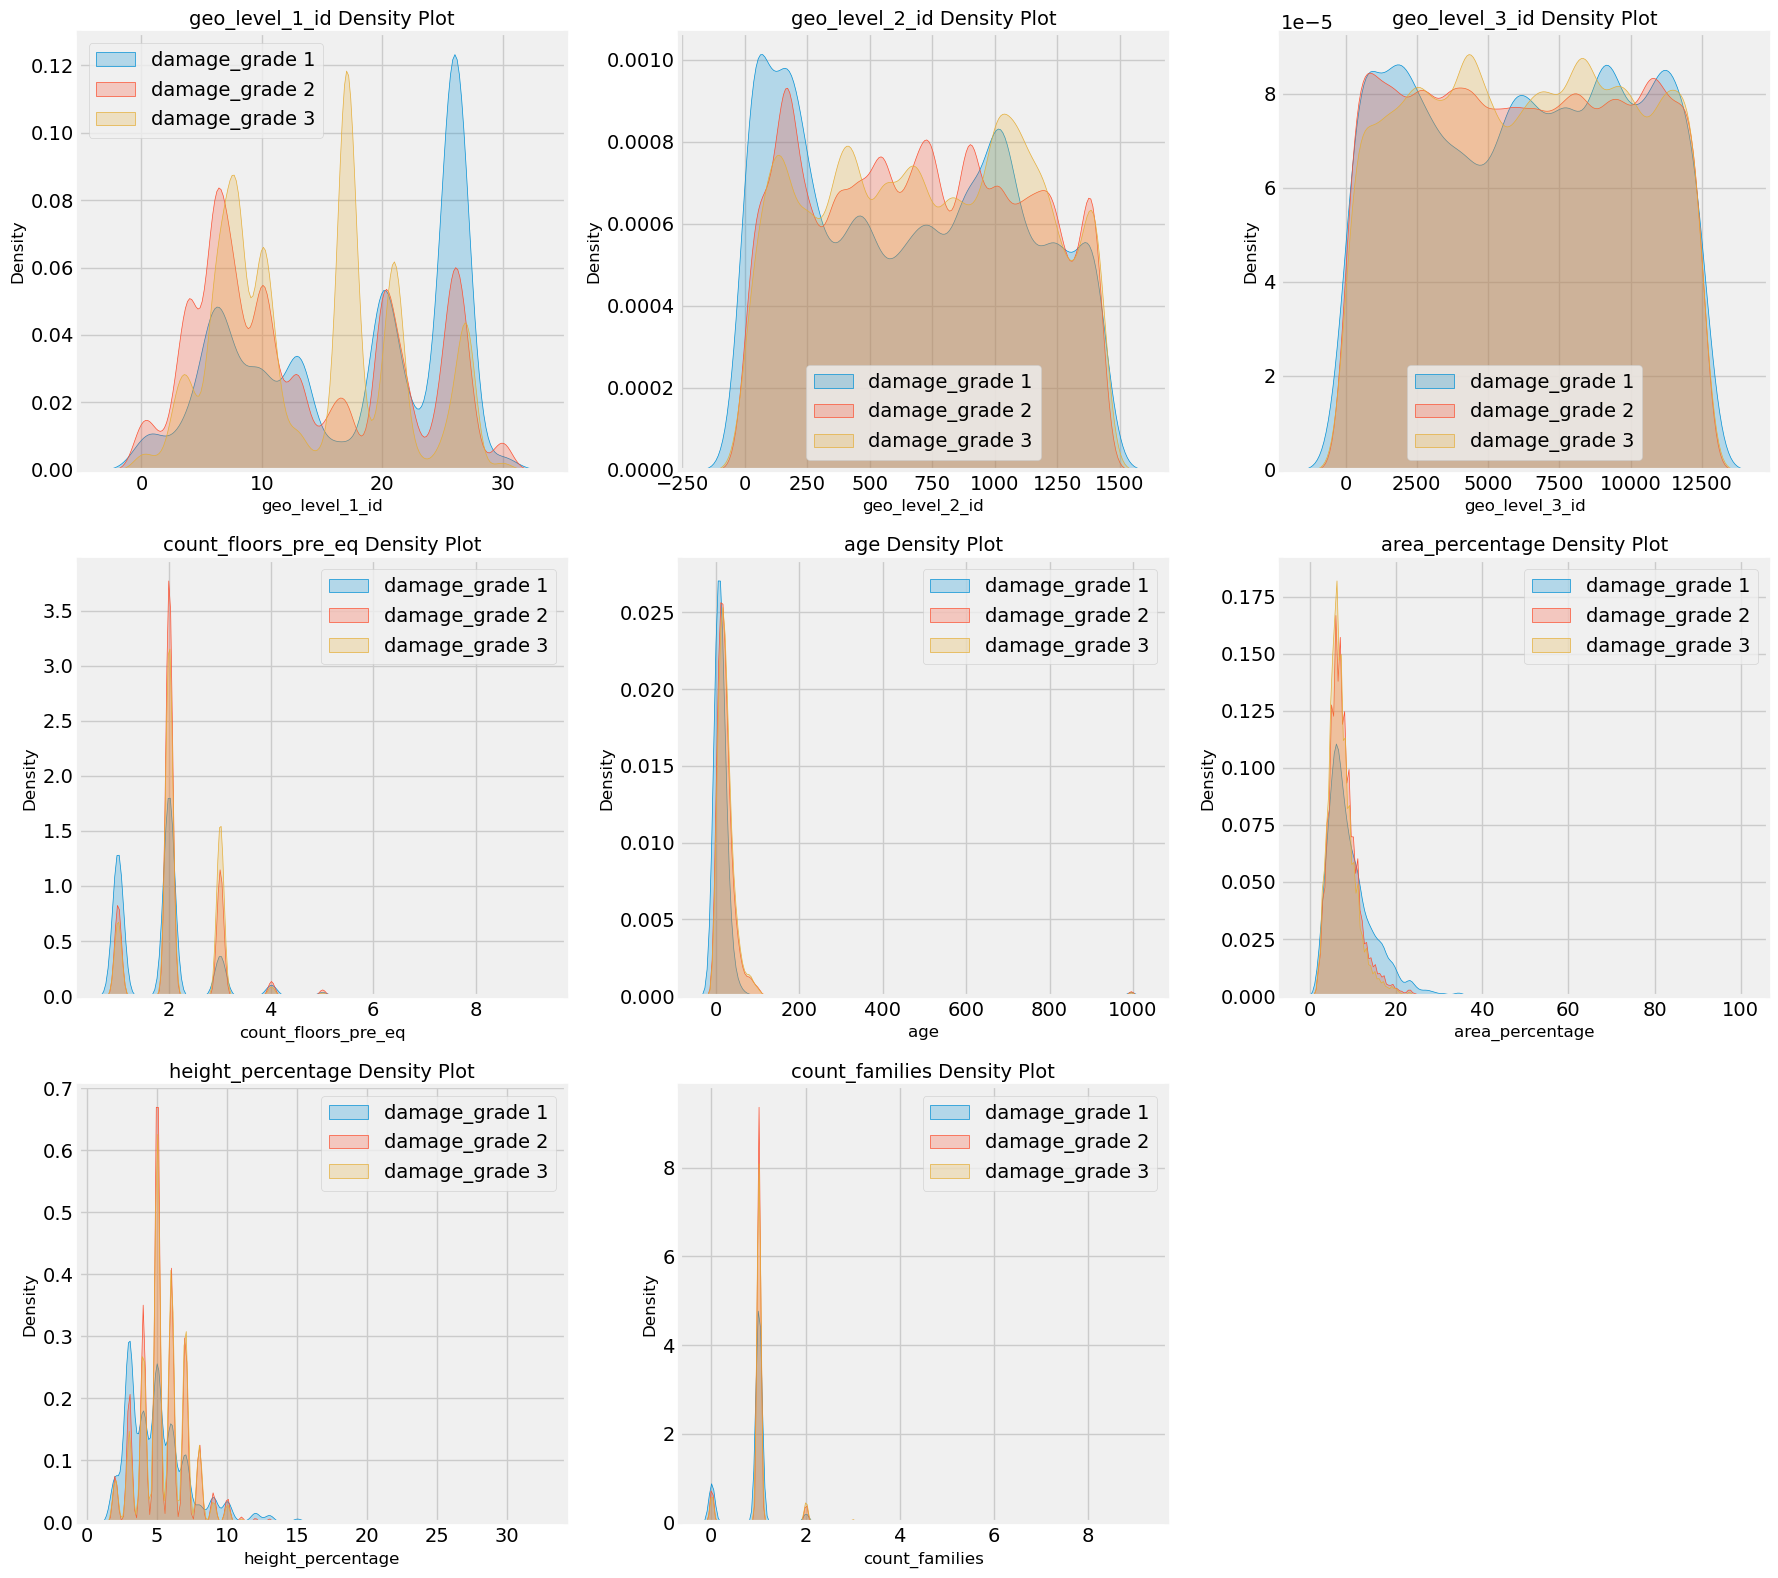

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def densityPlot(integer_columns):
    fig = plt.figure(figsize=(18, 16))
    plt.style.use('fivethirtyeight')  # 
    
    plotnumber = 1
    for column in integer_columns.columns:
        ax = fig.add_subplot(3, 3, plotnumber)  
        
        # KDE plots for each damage_grade (1, 2, 3)
        sns.kdeplot(combined_data.loc[combined_data['damage_grade'] == 1, column], ax=ax, label='damage_grade 1', shade=True)
        sns.kdeplot(combined_data.loc[combined_data['damage_grade'] == 2, column], ax=ax, label='damage_grade 2', shade=True)
        sns.kdeplot(combined_data.loc[combined_data['damage_grade'] == 3, column], ax=ax, label='damage_grade 3', shade=True)
        
        ax.set_title(f'{column} Density Plot', fontsize=14)
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
        ax.legend()
        
        plotnumber += 1

    plt.tight_layout()  
    plt.show()

# Calling the function
densityPlot(integer_columns)


##### What is/are the insight(s) found from the charts?


- Different regions (geo levels 1, 2, and 3) have varying damage patterns, with some regions showing a higher concentration of severe damage (damage grade 3) compared to others.
- Buildings with fewer floors (1-2) are more likely to have lower damage grades, while taller buildings are prone to higher damage.
- Older buildings tend to show higher damage grades, indicating structural deterioration over time contributes to vulnerability.
- Smaller buildings (lower area percentage) are associated with lower damage grades, while larger ones tend to have more severe damage.
- The distribution of damage grades across height percentage suggests that taller buildings, relative to their area, are more susceptible to higher damage grades.
- Buildings with a higher number of families tend to show increased damage severity, likely due to structural strain from higher occupancy.
- uildings with a lower height percentage (below 10%) are more likely to experience higher damage grades, indicating that taller structures relative to their footprint are more vulnerable to severe damage.
- Buildings with fewer families (1-2) tend to dominate all damage grades, but higher damage grades are slightly more common in structures with a larger number of families, suggesting increased risk with occupancy.

#### **Categorical columns**


##### Create new dataframe for Categorical columns only.

In [24]:
categorical_columns =combined_data [[
    'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
    'position', 'plan_configuration', 'legal_ownership_status'
]]


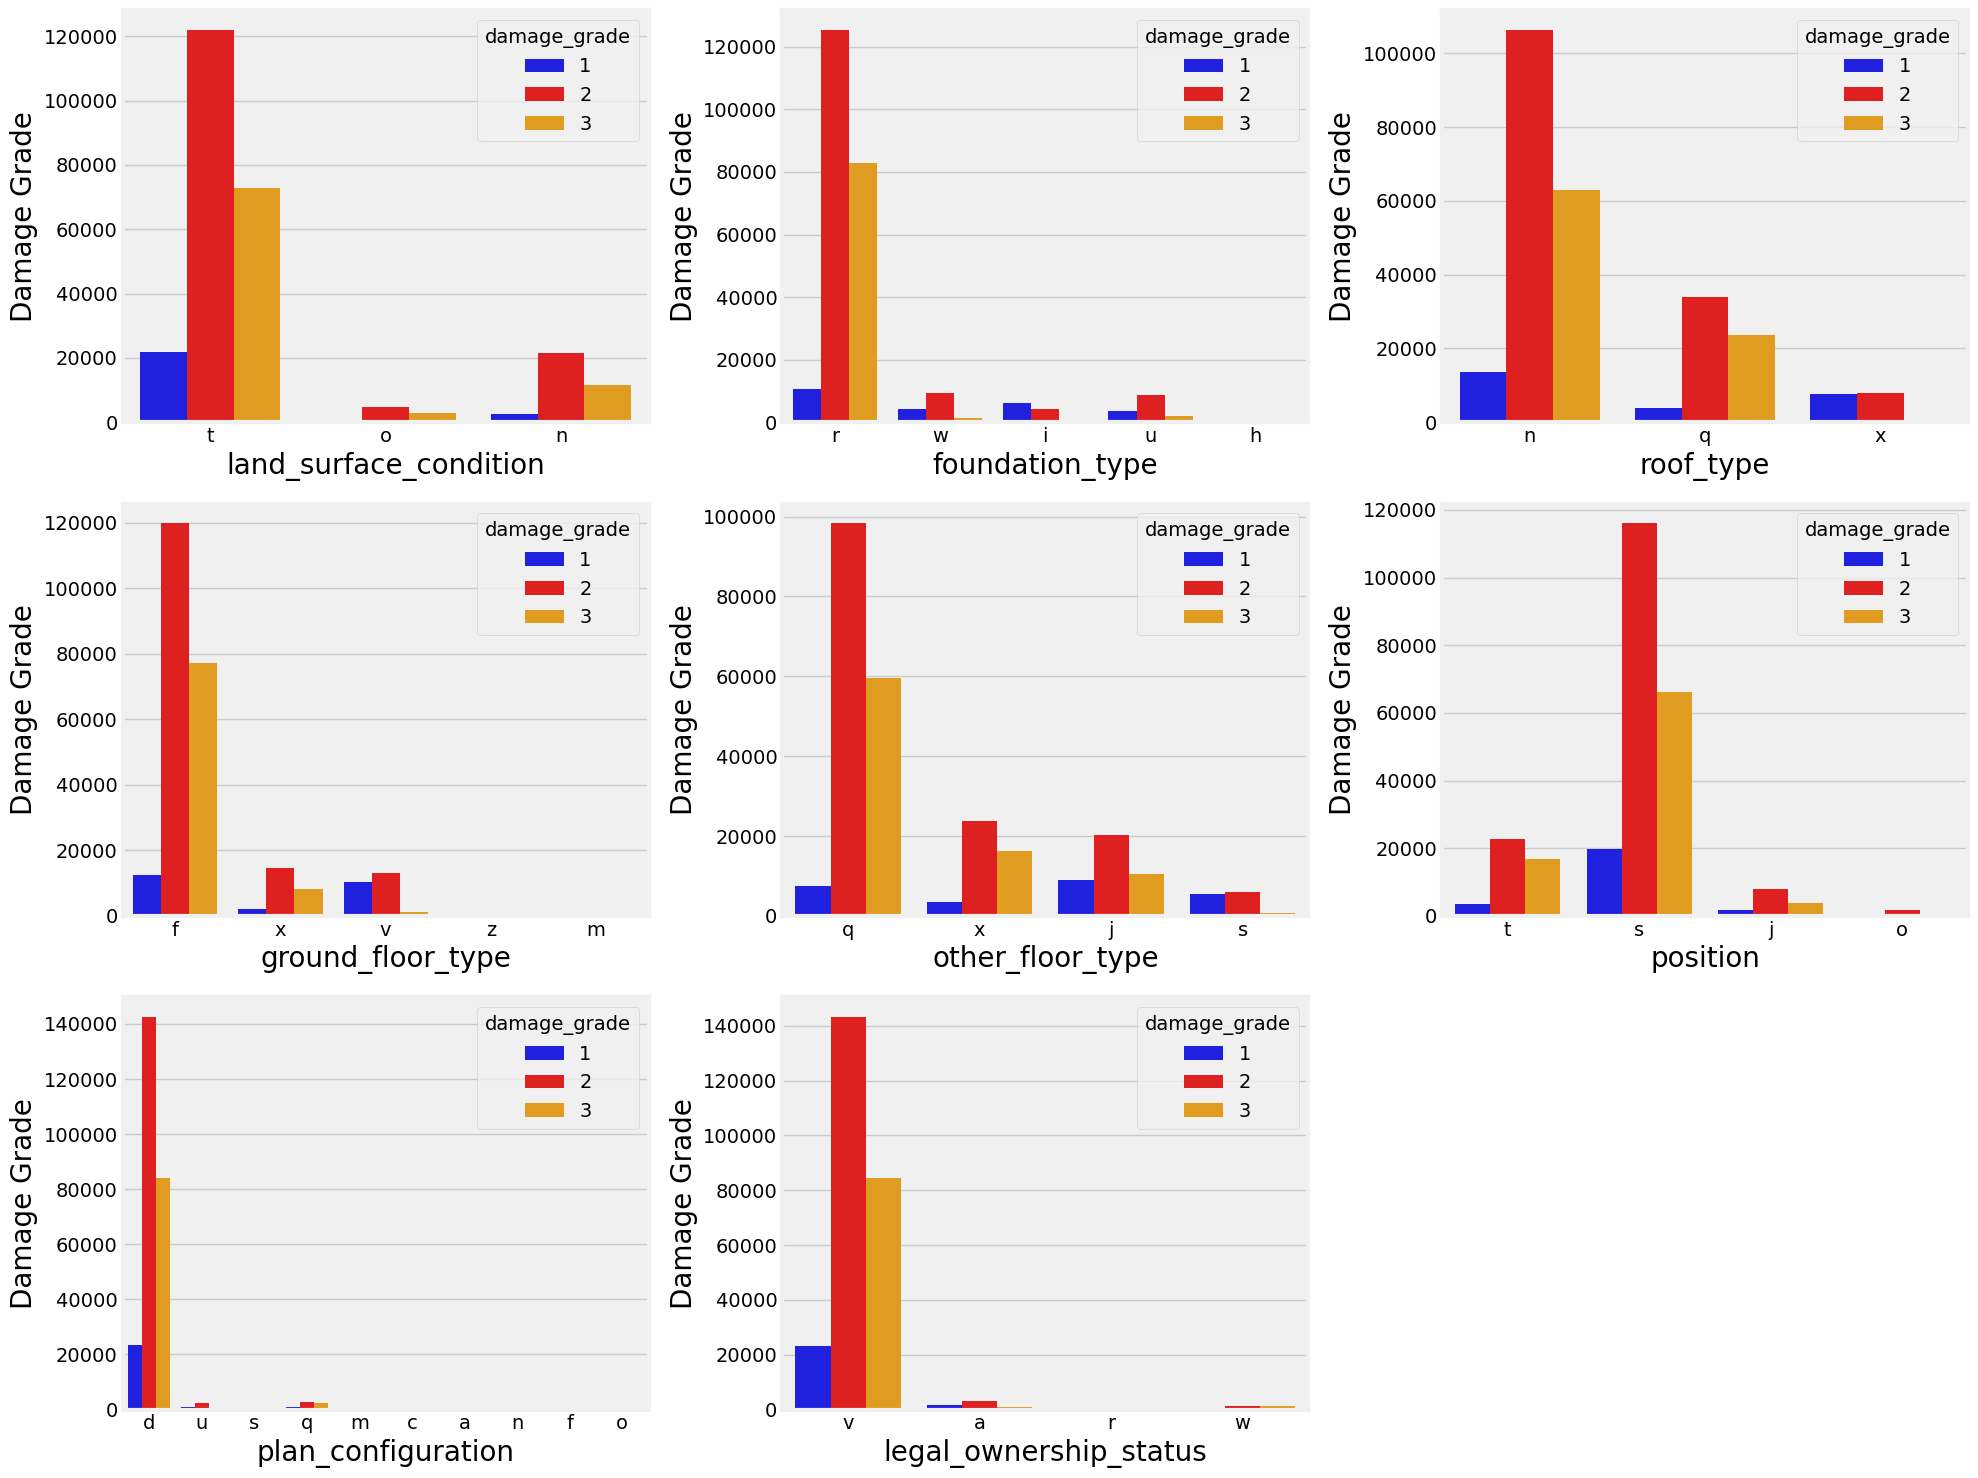

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15), facecolor='white') 
plotnumber = 1

for column in categorical_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber) 
        sns.countplot(
            x=combined_data[column].dropna(axis=0),  
            hue=combined_data.damage_grade,         
            palette=['blue', 'red', 'orange']       
        )
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Damage Grade', fontsize=20)
    plotnumber += 1

plt.tight_layout()  
plt.show()


##### What is/are the insight(s) found from the charts?


- Damage grades 2 and 3 are more frequent across most variables, indicating that moderate to severe damage is common in the dataset.
- Structures on land surface type t consistently show the highest frequency of damage, particularly grades 2 and 3, compared to other land types (o and n).
- Foundation type r is associated with higher damage frequencies, highlighting its vulnerability to damage during earthquakes.
- Structures with roof type n show a significantly higher occurrence of damage grades 2 and 3 compared to other roof types (q and x).
- Ground floor type f is heavily represented in damage grades 2 and 3, indicating it might be a design or material factor contributing to damage severity.
- Structures with plan configuration d are the most commonly associated with higher damage grades (2 and 3), suggesting that this layout might not be optimal for earthquake resistance.

## ***4.Data Preprocessing and Feature Engineering.***


In [26]:
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


### Checking missing values/null values

In [27]:
## cheking for missing values
combined_data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

#### No missing values in data so no need to handle them.

### Categorical Encoding

In [28]:
## Categorical data conversion
categorical_columns

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v
...,...,...,...,...,...,...,...,...
260596,n,r,n,f,j,s,q,v
260597,t,r,n,f,q,s,d,v
260598,t,r,q,f,q,s,d,v
260599,t,r,x,v,s,j,d,v


### 1) land_surface_condition

In [29]:
combined_data['land_surface_condition'].unique()#checking unique value in land_surface_condition column

array(['t', 'o', 'n'], dtype=object)

In [30]:
combined_data.land_surface_condition.value_counts()

land_surface_condition
t    216757
n     35528
o      8316
Name: count, dtype: int64

In [31]:
combined_data['land_surface_condition']=combined_data['land_surface_condition'].map({'t':2,'n':1,
                                             'o':0 })
   

In [32]:
print(combined_data['land_surface_condition'])

0         2
1         0
2         2
3         2
4         2
         ..
260596    1
260597    2
260598    2
260599    2
260600    1
Name: land_surface_condition, Length: 260601, dtype: int64


### 2) foundation_type

In [33]:
combined_data['foundation_type'].unique()#checking unique value in foundation_type column

array(['r', 'w', 'i', 'u', 'h'], dtype=object)

In [34]:
combined_data.foundation_type.value_counts()

foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: count, dtype: int64

In [35]:
combined_data['foundation_type']=combined_data['foundation_type'].map({'r':4,'w':3,'u':2,
                                             'i':1,'h':0 })

In [36]:
print(combined_data['foundation_type'])

0         4
1         4
2         4
3         4
4         4
         ..
260596    4
260597    4
260598    4
260599    4
260600    4
Name: foundation_type, Length: 260601, dtype: int64


### 3) roof_type

In [37]:
combined_data['roof_type'].unique()#checking unique value in rooftype column

array(['n', 'q', 'x'], dtype=object)

In [38]:
combined_data.roof_type.value_counts()

roof_type
n    182842
q     61576
x     16183
Name: count, dtype: int64

In [39]:
combined_data['roof_type']=combined_data['roof_type'].map({'n':2,'q':1,
                                             'x':2 })
   

In [40]:
print(combined_data['roof_type'])

0         2
1         2
2         2
3         2
4         2
         ..
260596    2
260597    2
260598    1
260599    2
260600    2
Name: roof_type, Length: 260601, dtype: int64


### 4) ground_floor_type 

In [41]:
combined_data['ground_floor_type'].unique()#checking unique value in ground_floor_type column

array(['f', 'x', 'v', 'z', 'm'], dtype=object)

In [42]:
combined_data.ground_floor_type.value_counts()

ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: count, dtype: int64

In [43]:
combined_data['ground_floor_type']=combined_data['ground_floor_type'].map({'f':4,'x':3,
                                             'v':2,'z':1,'m':0 })
   

In [44]:
print(combined_data['ground_floor_type'])

0         4
1         3
2         4
3         4
4         4
         ..
260596    4
260597    4
260598    4
260599    2
260600    4
Name: ground_floor_type, Length: 260601, dtype: int64


### 5) other_floor_type

In [45]:
combined_data['other_floor_type'].unique() #checking unique value in other_floor_type column

array(['q', 'x', 'j', 's'], dtype=object)

In [46]:
combined_data.other_floor_type.value_counts()

other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: count, dtype: int64

In [47]:
combined_data['other_floor_type']=combined_data['other_floor_type'].map({'q':3,'x':2,'j':1,'s':0})

In [48]:
print(combined_data['other_floor_type'])

0         3
1         3
2         2
3         2
4         2
         ..
260596    1
260597    3
260598    3
260599    0
260600    3
Name: other_floor_type, Length: 260601, dtype: int64


### 6) position

In [49]:
combined_data['position'].unique() #checking unique value in position column

array(['t', 's', 'j', 'o'], dtype=object)

In [50]:
combined_data['position'].value_counts()

position
s    202090
t     42896
j     13282
o      2333
Name: count, dtype: int64

In [51]:
combined_data['position']=combined_data['position'].map({'s':3,'t':2,'j':1,'o':0})

In [52]:
print(combined_data['position'])

0         2
1         3
2         2
3         3
4         3
         ..
260596    3
260597    3
260598    3
260599    1
260600    1
Name: position, Length: 260601, dtype: int64


### 7) plan_configuration

In [53]:
combined_data['plan_configuration'].unique() #checking unique value in plan_configuration column

array(['d', 'u', 's', 'q', 'm', 'c', 'a', 'n', 'f', 'o'], dtype=object)

In [54]:
combined_data['plan_configuration'].value_counts()

plan_configuration
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: count, dtype: int64

In [55]:
combined_data['plan_configuration']=combined_data['plan_configuration'].map({'d':9,'q':8,'u':7,'s':6,'c':5,'a':4,'o':3,'m':2,'n':1,'f':0})

In [56]:
print(combined_data['plan_configuration'])

0         9
1         9
2         9
3         9
4         9
         ..
260596    8
260597    9
260598    9
260599    9
260600    9
Name: plan_configuration, Length: 260601, dtype: int64


### 8) legal_ownership_status

In [57]:
combined_data['legal_ownership_status'].unique() #checking unique value in legal_ownership_status column.

array(['v', 'a', 'r', 'w'], dtype=object)

In [58]:
combined_data['legal_ownership_status'].value_counts()

legal_ownership_status
v    250939
a      5512
w      2677
r      1473
Name: count, dtype: int64

In [59]:
combined_data['legel_ownership_status']=combined_data['legal_ownership_status'].map({'v':3,'a':2,'w':1,'r':0})

In [60]:
print(combined_data['legel_ownership_status'])

0         3
1         3
2         3
3         3
4         3
         ..
260596    3
260597    3
260598    3
260599    3
260600    3
Name: legel_ownership_status, Length: 260601, dtype: int64


### Why use  Manual encoding?

Manual encoding is suitable for above columns due to the small number of categories, the potential for meaningful mappings using domain knowledge, avoiding library dependencies, and enabling custom grouping or prioritization.



In [61]:
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,legel_ownership_status
0,802906,6,487,12198,2,30,6,5,2,4,...,0,0,0,0,0,0,0,0,3,3
1,28830,8,900,2812,2,10,8,7,0,4,...,0,0,0,0,0,0,0,0,2,3
2,94947,21,363,8973,2,10,5,5,2,4,...,0,0,0,0,0,0,0,0,3,3
3,590882,22,418,10694,2,10,6,5,2,4,...,0,0,0,0,0,0,0,0,2,3
4,201944,11,131,1488,3,30,8,9,2,4,...,0,0,0,0,0,0,0,0,3,3


## Handling the outliers

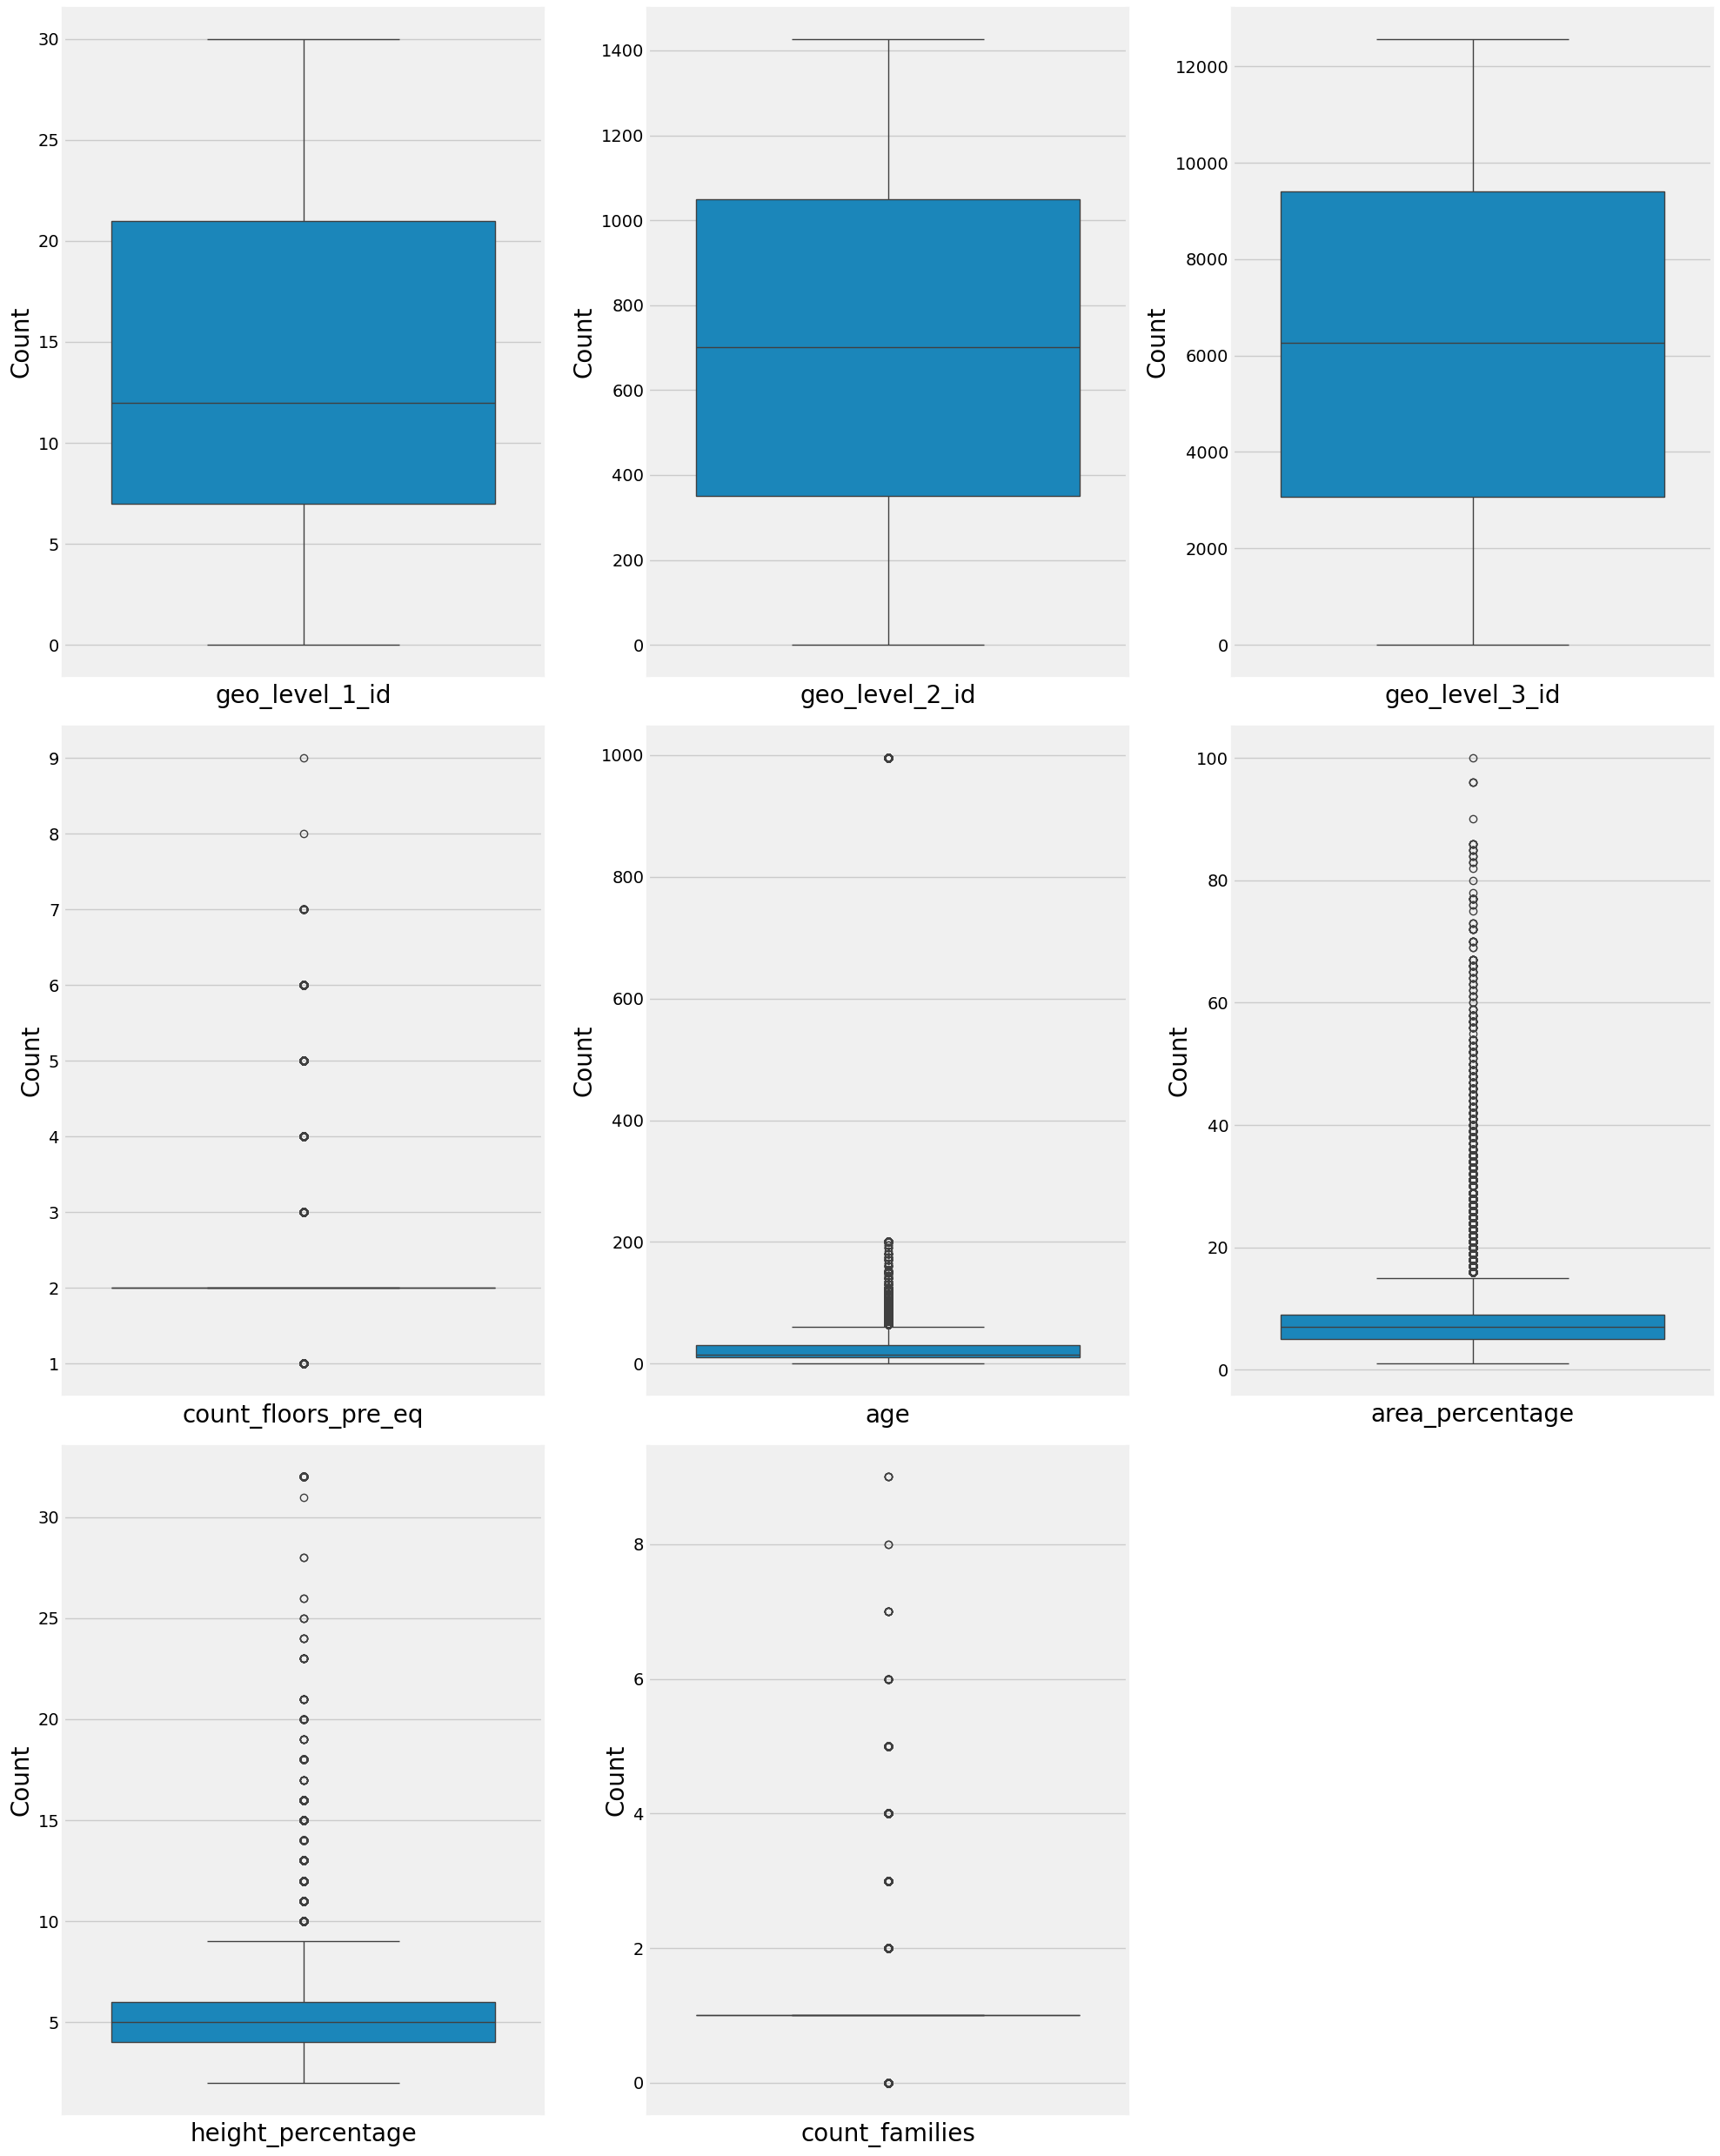

In [62]:
## Checking the outliers for numerical columns 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in integer_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(combined_data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### 1) count_floors_pre_eq

In [63]:
# Calculate quartiles
Q1 = combined_data['count_floors_pre_eq'].quantile(0.25)
Q3 = combined_data['count_floors_pre_eq'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

0.0

In [64]:
#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


2.0
2.0


serum_cholesterol_mg_per_dl
oldpeak_eq_st_depression

In [65]:
# Remove outliers
combined_data = combined_data[(combined_data['count_floors_pre_eq'] >= lower_bound) & (combined_data['count_floors_pre_eq'] <= upper_bound)]

### 2) age

In [66]:
# Calculate quartiles
Q1 = combined_data['age'].quantile(0.25)
Q3 = combined_data['age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

15.0

In [67]:
#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


-12.5
47.5


In [68]:
# Remove outliers
combined_data = combined_data[(combined_data['age'] >= lower_bound) & (combined_data['age'] <= upper_bound)]

### 3) area_percentage

In [69]:
# Calculate quartiles
Q1 = combined_data['area_percentage'].quantile(0.25)
Q3 = combined_data['area_percentage'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

4.0

In [70]:
#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


-1.0
15.0


In [71]:
# Remove outliers
combined_data = combined_data[(combined_data['area_percentage'] >= lower_bound) & (combined_data['area_percentage'] <= upper_bound)]

### 4) height_percentage

In [72]:
# Calculate quartiles
Q1 = combined_data['height_percentage'].quantile(0.25)
Q3 = combined_data['height_percentage'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

1.0

In [73]:
#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


3.5
7.5


In [74]:
# Remove outliers
combined_data = combined_data[(combined_data['height_percentage'] >= lower_bound) & (combined_data['height_percentage'] <= upper_bound)]

### 5) count_families

In [75]:
# Calculate quartiles
Q1 = combined_data['count_families'].quantile(0.25)
Q3 = combined_data['count_families'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

0.0

In [76]:
#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


1.0
1.0


In [77]:
# Remove outliers
combined_data = combined_data[(combined_data['count_families'] >= lower_bound) & (combined_data['count_families'] <= upper_bound)]

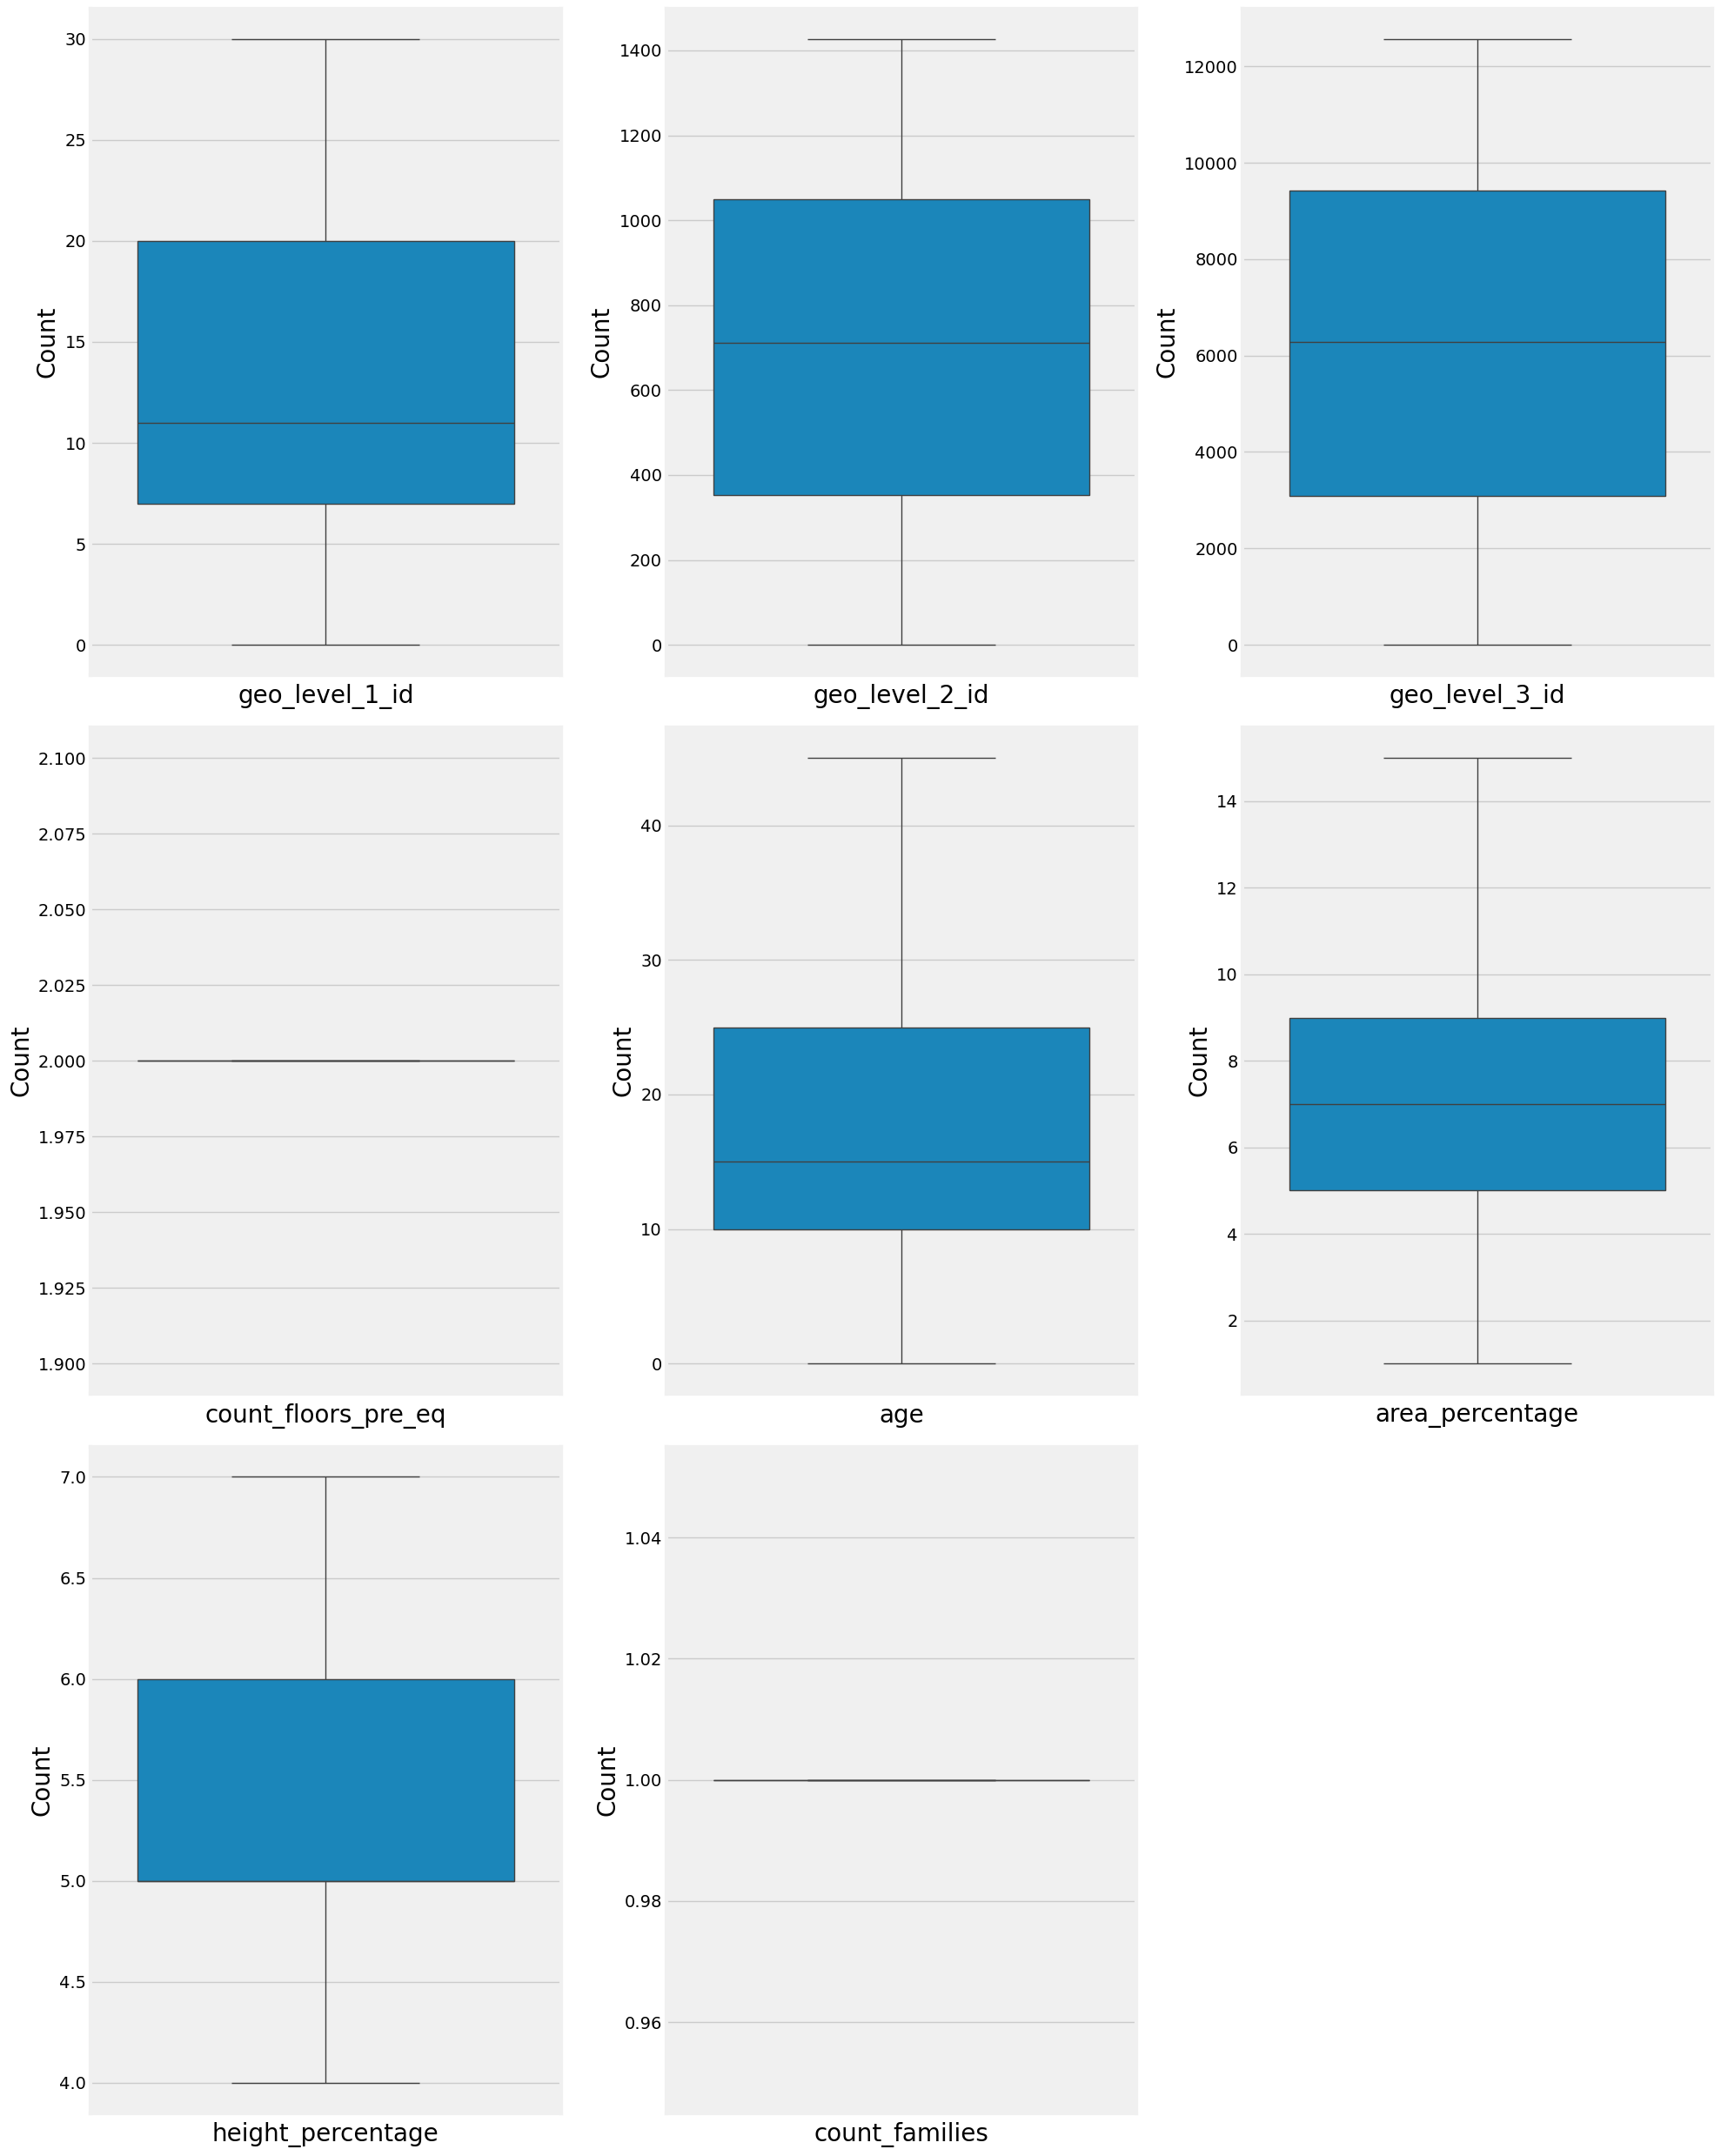

In [78]:
## Checking the outliers for numerical columns 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in integer_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(combined_data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### What all outlier treatment techniques have you used and why did you use those techniques?
Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of Selling Price and convert those outliers into median values

## Feature Selection

In [79]:

# Select integer columns
int_cols = combined_data.select_dtypes(include=['int64']) 
int_cols.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_u

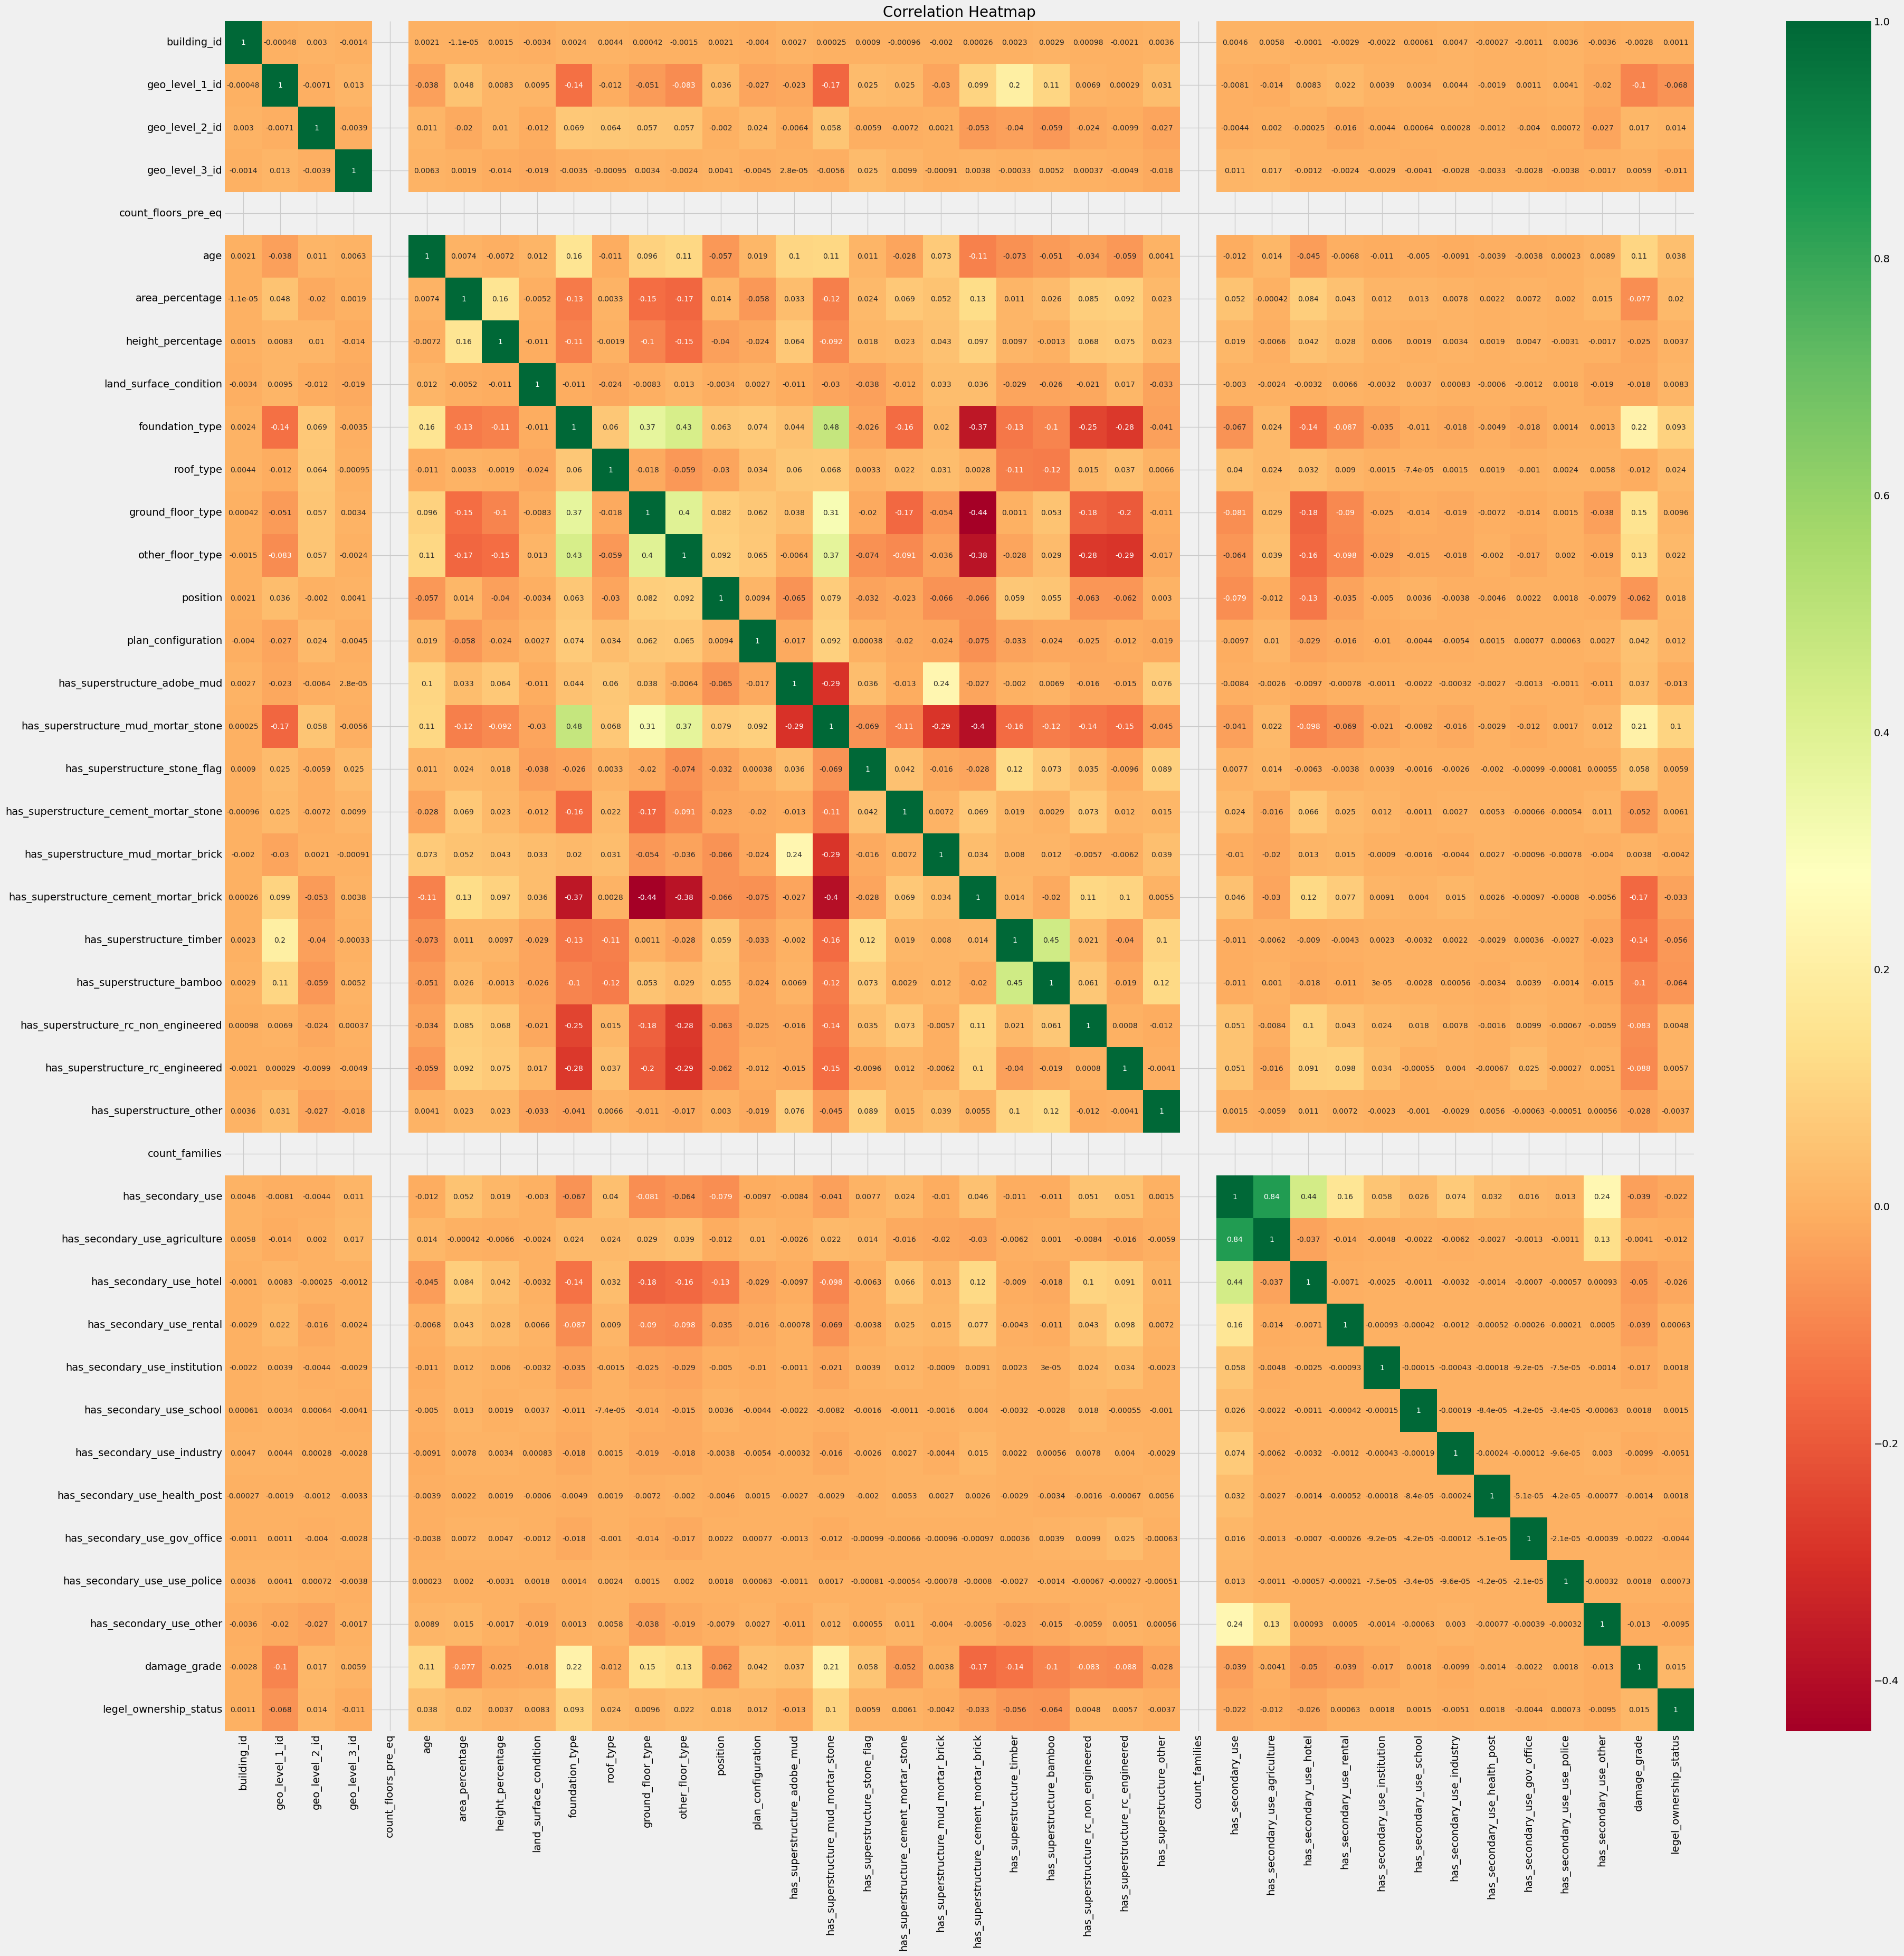

In [80]:
int_cols = combined_data.select_dtypes(include=['number']).iloc[:, :40]  # Select first 40 numerical columns

# Plot correlation heatmap
plt.figure(figsize=(40, 40))  # Adjust canvas size for better visibility
sns.heatmap(int_cols.corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 10})  # Set annot size
plt.title("Correlation Heatmap", fontsize=20)  # Optional: Add title
plt.show()

### insights

- Droped Unwanted and constant features .
- following features that i droped that has high correlated  with other coulmns so deleted one of them.  

In [81]:
combined_data.drop(['building_id', 'has_secondary_use_other', 'has_secondary_use_gov_office', 'other_floor_type', 'has_secondary_use', 'legal_ownership_status', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution','has_secondary_use_agriculture',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_use_police'], axis="columns", inplace=True)


In [82]:
combined_data.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'position', 'plan_configuration',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'damage_grade', 'legel_ownership_status'],
      dtype='object')

### Model Creation

In [83]:
## Creating independent and dependent variable
X= combined_data.drop('damage_grade', axis=1)
y = combined_data.damage_grade 

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [85]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_resampled))


Actual Classes Counter({2: 49539, 3: 26411, 1: 6155})
SMOTE Classes Counter({3: 49539, 2: 49539, 1: 49539})


#### Why we use SMOTE ?

The reason for using SMOTE (Synthetic Minority Over-sampling Technique) in this step is to address the class imbalance in the dataset. By applying SMOTE, we generate synthetic samples for the underrepresented classes, ensuring that the model has more balanced data to learn from. This helps the model better generalize to all classes, rather than being biased towards the majority class. It also improves model performance, especially in imbalanced datasets, by reducing prediction errors for minority classes. Finally, it enables the model to learn more about the minority class characteristics.

### ***6.ML Model Implementation***


### ML Model - 1 : Logistic regression


In [86]:
# Train the Logistic Regression model on the resampled training data
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training set
y_train_resampled_pred = model.predict(X_train_resampled)

# Predict on the test set (unchanged)
y_test_pred = model.predict(X_test)

# Calculate training accuracy (on the resampled training set)
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
print("Training Accuracy (Resampled Data):", train_accuracy)

# Calculate test accuracy (on the original test set)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Original Data):", test_accuracy)

# Print classification reports
print("\nClassification Report (Resampled Training Set):\n", classification_report(y_train_resampled, y_train_resampled_pred))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Print confusion matrix for the test set
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy (Resampled Data): 0.4741382210648849
Test Accuracy (Original Data): 0.4110776401045811

Classification Report (Resampled Training Set):
               precision    recall  f1-score   support

           1       0.54      0.64      0.59     49539
           2       0.40      0.42      0.41     49539
           3       0.47      0.36      0.41     49539

    accuracy                           0.47    148617
   macro avg       0.47      0.47      0.47    148617
weighted avg       0.47      0.47      0.47    148617


Classification Report (Test Set):
               precision    recall  f1-score   support

           1       0.15      0.61      0.24      2638
           2       0.62      0.42      0.50     21231
           3       0.39      0.35      0.37     11319

    accuracy                           0.41     35188
   macro avg       0.39      0.46      0.37     35188
weighted avg       0.51      0.41      0.44     35188


Confusion Matrix (Test Set):
 [[1603  694  341

#### Insights:

From the Logisticregression algorithm i got test accuracy is 41% and  train accuracy is 47%.

That is very few accuracy.So, i have decided to tune the data using RondomizedSearchCv


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter space
param_dist = {
    'C': np.logspace(-4, 4, 10),  # Regularization strength (small = strong regularization)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['saga', 'liblinear', 'lbfgs'],  # Different optimization solvers
    'max_iter': [100, 500, 1000],  # Number of iterations
    'class_weight': [None, 'balanced']  # Handles class imbalance
}

# Initialize model
model = LogisticRegression(random_state=42)

# Perform Randomized Search CV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', 
    n_jobs=-1, verbose=2, random_state=42
)
random_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters
print("Best Parameters:", random_search.best_params_)
model = random_search.best_estimator_  # Updating model with best parameters

# Make predictions
y_train_resampled_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy (Resampled Data):", train_accuracy)
print("Test Accuracy (Original Data):", test_accuracy)

# Print classification reports
print("\nClassification Report (Resampled Training Set):\n", classification_report(y_train_resampled, y_train_resampled_pred))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'class_weight': None, 'C': 0.005994842503189409}
Training Accuracy (Resampled Data): 0.5666242758230888
Test Accuracy (Original Data): 0.4840286461293623

Classification Report (Resampled Training Set):
               precision    recall  f1-score   support

           1       0.72      0.64      0.68     49539
           2       0.50      0.44      0.47     49539
           3       0.50      0.61      0.55     49539

    accuracy                           0.57    148617
   macro avg       0.57      0.57      0.57    148617
weighted avg       0.57      0.57      0.57    148617


Classification Report (Test Set):
               precision    recall  f1-score   support

           1       0.25      0.54      0.34      2638
           2       0.65      0.44      0.52     21231
           3       0.42      0.56      0.48     11319

    accuracy             

### Cross validation and Hyperparameter tunning.

In [ ]:
# Hyperparameter search space
param_dist = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200],
    'penalty': ['l2'],
    'multi_class': ['ovr', 'multinomial']
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(LogisticRegression(random_state=42),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit model
random_search.fit(X_train, y_train)

# Best model and evaluation
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))

# Reports
print("\nClassification Report:\n", classification_report(y_test, best_model.predict(X_test)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_model.predict(X_test)))


#### Which hyperparameter optimization technique have i used and why?


RandomizedSearchCV is an efficient hyperparameter tuning method that randomly samples parameter combinations to balance speed and exploration. It is faster than GridSearchCV, suitable for large datasets or complex models, and uses cross-validation for reliable performance estimation. This approach works effectively for optimizing any algorithm's hyperparameters.

#### 'Have i seen any improvement? 

After tunning i have seen that there is increase in both train and test performance as 60% and 60% seems same both accurcy this is  good model for our prediciton.

### ML Model - 2 : DicisionTreeClassifire


In [ ]:
# Initialize the model
model_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model
model_dt.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred_dt = model_dt.predict(X_train_resampled)
y_test_pred_dt = model_dt.predict(X_test)

# Evaluate the model
print("Training Accuracy (Decision Tree):", accuracy_score(y_train_resampled, y_train_pred_dt))
print("Test Accuracy (Decision Tree):", accuracy_score(y_test, y_test_pred_dt))

print("\nClassification Report (Test Set - Decision Tree):\n", classification_report(y_test, y_test_pred_dt))
print("\nConfusion Matrix (Test Set - Decision Tree):\n", confusion_matrix(y_test, y_test_pred_dt))


#### Insights:

From the DicisionTreeClassifire algorithm i got test accuracy is 64% that is good but train accuracy is 98 which  shows the overfitting condition on train dataset.

So, i have decided to tune the data using GridSearchCV.



### Cross validation and Hyperparameter tunning.

In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],          
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'class_weight': ['balanced']               
}

# Initialize the model
model_dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best model
best_params = grid_search.best_params_
best_model_dt = grid_search.best_estimator_

print("Best Hyperparameters for Decision Tree:", best_params)

# Make predictions using the best model
y_train_pred_dt = best_model_dt.predict(X_train_resampled)
y_test_pred_dt = best_model_dt.predict(X_test)

# Evaluate the tuned model
print("Training Accuracy (Tuned Decision Tree):", accuracy_score(y_train_resampled, y_train_pred_dt))
print("Test Accuracy (Tuned Decision Tree):", accuracy_score(y_test, y_test_pred_dt))

print("\nClassification Report (Test Set - Tuned Decision Tree):\n", classification_report(y_test, y_test_pred_dt))
print("\nConfusion Matrix (Test Set - Tuned Decision Tree):\n", confusion_matrix(y_test, y_test_pred_dt))


##### Which hyperparameter optimization technique have i used and why?

We used GridSearchCV to optimize hyperparameters like max_depth and min_samples_split for the Decision Tree classifier. It systematically searches through a grid of parameter values to find the best combination for improved performance. By using cross-validation, it ensures better generalization and reduces overfitting. This process saves time compared to manual tuning and provides an optimal balance between model complexity and accuracy. It helps identify the most effective parameters for better predictions.

#### Have i seen any improvement?


From the above tuned DecisionTreeClassifire, it has seen that earlier we have faced overfitting condition.


### ML Model - 3 : RandomForestClassifier


In [86]:
# Initialize the model
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred_rf = model_rf.predict(X_train_resampled)
y_test_pred_rf = model_rf.predict(X_test)

# Evaluate the model
print("Training Accuracy (Random Forest):", accuracy_score(y_train_resampled, y_train_pred_rf))
print("Test Accuracy (Random Forest):", accuracy_score(y_test, y_test_pred_rf))

print("\nClassification Report (Test Set - Random Forest):\n", classification_report(y_test, y_test_pred_rf))
print("\nConfusion Matrix (Test Set - Random Forest):\n", confusion_matrix(y_test, y_test_pred_rf))


Training Accuracy (Random Forest): 0.9868251949642369
Test Accuracy (Random Forest): 0.7015744003637604

Classification Report (Test Set - Random Forest):
               precision    recall  f1-score   support

           1       0.48      0.49      0.49      2638
           2       0.76      0.77      0.76     21231
           3       0.65      0.63      0.64     11319

    accuracy                           0.70     35188
   macro avg       0.63      0.63      0.63     35188
weighted avg       0.70      0.70      0.70     35188


Confusion Matrix (Test Set - Random Forest):
 [[ 1302  1243    93]
 [ 1278 16244  3709]
 [  150  4028  7141]]


#### Insights:

From the Randomforestclassifire algorithm i got test accuracy is 70% that is good but train accuracy is 98 which  shows the overfitting condition on train dataset.

So, i have decided to tune the data using RandomizedSearchCV



In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample 20% of the training data for faster hyperparameter tuning
X_train_subset = X_train_resampled.sample(frac=0.2, random_state=42)
y_train_subset = y_train_resampled.loc[X_train_subset.index]

# Define hyperparameter distributions
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features per tree
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    model_rf,  # Using model_rf directly
    param_distributions=param_dist,
    n_iter=10, cv=2, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2
)

# Fit on the subset for tuning
random_search.fit(X_train_subset, y_train_subset)

# Get the best model
model_rf = random_search.best_estimator_

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Train the best model on the full resampled dataset
model_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred_rf = model_rf.predict(X_train_resampled)
y_test_pred_rf = model_rf.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))

# Print classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred_rf))

# Print confusion matrix
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred_rf))


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Training Accuracy: 0.9868251949642369
Test Accuracy: 0.7019154257133113

Classification Report (Test Set):
               precision    recall  f1-score   support

           1       0.48      0.49      0.48      2638
           2       0.75      0.77      0.76     21231
           3       0.65      0.63      0.64     11319

    accuracy                           0.70     35188
   macro avg       0.63      0.63      0.63     35188
weighted avg       0.70      0.70      0.70     35188


Confusion Matrix (Test Set):
 [[ 1295  1252    91]
 [ 1266 16269  3696]
 [  145  4039  7135]]


### Cross validation and Hyperparameter tunning.

In [ ]:
# Subset data for faster tuning (optional)
X_train_subset = X_train.sample(frac=0.2, random_state=42)
y_train_subset = y_train[X_train_subset.index]

# Define parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10, cv=2, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2
)

# Fit and evaluate
random_search.fit(X_train_subset, y_train_subset)
best_model = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
print("Training Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))

# Classification Report for the test set
print("\nClassification Report (Test Set):\n", classification_report(y_test, best_model.predict(X_test)))

# Confusion Matrix for the test set
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, best_model.predict(X_test)))

##### Which hyperparameter optimization technique have i used and why?

RandomizedSearchCV is an efficient hyperparameter tuning method that randomly samples parameter combinations to balance speed and exploration. It is faster than GridSearchCV, suitable for large datasets or complex models, and uses cross-validation for reliable performance estimation. This approach works effectively for optimizing any algorithm's hyperparameters.

#### Have i seen any improvement?

After tunning i have seen tha accuracy gives best in both train and test performance as 73% and 70% seems no overfitting issu so very good  model for our prediciton.

### ML Model - 4: XGBClassifire.


In [89]:
y_train_resampled_adjusted = y_train_resampled - 1
y_test_adjusted = y_test - 1

# Initialize the model
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
model_xgb.fit(X_train_resampled, y_train_resampled_adjusted)

# Make predictions
y_train_pred_xgb = model_xgb.predict(X_train_resampled)
y_test_pred_xgb = model_xgb.predict(X_test)

# Shift predictions back to original labels
y_train_pred_xgb = y_train_pred_xgb + 1
y_test_pred_xgb = y_test_pred_xgb + 1

# Evaluate the model
print("Training Accuracy (XGBoost):", accuracy_score(y_train_resampled, y_train_pred_xgb))
print("Test Accuracy (XGBoost):", accuracy_score(y_test, y_test_pred_xgb))

print("\nClassification Report (Test Set - XGBoost):\n", classification_report(y_test, y_test_pred_xgb))
print("\nConfusion Matrix (Test Set - XGBoost):\n", confusion_matrix(y_test, y_test_pred_xgb))


Training Accuracy (XGBoost): 0.8043965360624962
Test Accuracy (XGBoost): 0.7121177674207116

Classification Report (Test Set - XGBoost):
               precision    recall  f1-score   support

           1       0.46      0.52      0.49      2638
           2       0.76      0.77      0.77     21231
           3       0.68      0.64      0.66     11319

    accuracy                           0.71     35188
   macro avg       0.64      0.65      0.64     35188
weighted avg       0.71      0.71      0.71     35188


Confusion Matrix (Test Set - XGBoost):
 [[ 1380  1203    55]
 [ 1443 16435  3353]
 [  161  3915  7243]]


In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Adjust labels
y_train_resampled_adjusted = y_train_resampled - 1
y_test_adjusted = y_test - 1

# Subset data for faster tuning (10% of training data)
X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train_resampled, y_train_resampled_adjusted, test_size=0.9, random_state=42
)

# Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200],  # Fewer trees for faster tuning
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'max_depth': [6, 10],  # Depth of trees
    'subsample': [0.8, 1.0],  # Use a portion of data per tree
    'colsample_bytree': [0.8, 1.0],  # Features per tree
    'min_child_weight': [1, 3],  # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1],  # Regularization to avoid overfitting
    'reg_lambda': [1, 10]  # L2 regularization
}

# Initialize the XGBoost model (model_xgb)
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform RandomizedSearchCV with fewer iterations (`n_iter=5`)
random_search = RandomizedSearchCV(
    model_xgb, param_distributions=param_dist,
    n_iter=5, cv=2, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1
)

# Fit on the smaller subset of data for tuning
random_search.fit(X_train_subset, y_train_subset)

# Get the best model from the random search
best_model_xgb = random_search.best_estimator_

# Print best parameters from the random search
print("Best Parameters:", random_search.best_params_)

# Train the best model on the full resampled data
best_model_xgb.fit(X_train_resampled, y_train_resampled_adjusted)

# Make predictions using the trained model
y_train_pred_xgb = best_model_xgb.predict(X_train_resampled) + 1
y_test_pred_xgb = best_model_xgb.predict(X_test) + 1

# Evaluate the model
print("Training Accuracy (XGBoost):", accuracy_score(y_train_resampled, y_train_pred_xgb))
print("Test Accuracy (XGBoost):", accuracy_score(y_test, y_test_pred_xgb))

# Print classification report
print("\nClassification Report (Test Set - XGBoost):\n", classification_report(y_test, y_test_pred_xgb))

# Print confusion matrix
print("\nConfusion Matrix (Test Set - XGBoost):\n", confusion_matrix(y_test, y_test_pred_xgb))


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Training Accuracy (XGBoost): 0.8045176527584328
Test Accuracy (XGBoost): 0.703023758099352

Classification Report (Test Set - XGBoost):
               precision    recall  f1-score   support

           1       0.45      0.52      0.48      2638
           2       0.76      0.75      0.76     21231
           3       0.66      0.66      0.66     11319

    accuracy                           0.70     35188
   macro avg       0.62      0.64      0.63     35188
weighted avg       0.71      0.70      0.70     35188


Confusion Matrix (Test Set - XGBoost):
 [[ 1375  1199    64]
 [ 1510 15899  3822]
 [  150  3705  7464]]


#### Insights:

From the XGB Classifire algorithm i got test accuracy is 71% that is good but train accuracy is 80 which also shows the overfitting condition on train dataset.

So, i have decided to tune the data using RandomizedsearchCV.

### Cross validation and Hyperparameter tunning.

In [91]:
from sklearn.model_selection import RandomizedSearchCV

y_train_resampled_adjusted = y_train_resampled - 1
y_test_adjusted = y_test - 1

# Initialize the model with hyperparameters
model_xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,  
    learning_rate=0.1, 
    max_depth=6,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    scale_pos_weight=1  
)

# Train the model
model_xgb.fit(X_train_resampled, y_train_resampled_adjusted)

# Make predictions
y_train_pred_xgb = model_xgb.predict(X_train_resampled)
y_test_pred_xgb = model_xgb.predict(X_test)

# Shift predictions back to original labels
y_train_pred_xgb = y_train_pred_xgb + 1
y_test_pred_xgb = y_test_pred_xgb + 1

# Evaluate the model
print("Training Accuracy (XGBoost):", accuracy_score(y_train_resampled, y_train_pred_xgb))
print("Test Accuracy (XGBoost):", accuracy_score(y_test, y_test_pred_xgb))

print("\nClassification Report (Test Set - XGBoost):\n", classification_report(y_test, y_test_pred_xgb))
print("\nConfusion Matrix (Test Set - XGBoost):\n", confusion_matrix(y_test, y_test_pred_xgb))


Training Accuracy (XGBoost): 0.7515492844021882
Test Accuracy (XGBoost): 0.6775036944412868

Classification Report (Test Set - XGBoost):
               precision    recall  f1-score   support

           1       0.41      0.52      0.45      2638
           2       0.75      0.72      0.73     21231
           3       0.63      0.64      0.63     11319

    accuracy                           0.68     35188
   macro avg       0.60      0.62      0.61     35188
weighted avg       0.68      0.68      0.68     35188


Confusion Matrix (Test Set - XGBoost):
 [[ 1359  1221    58]
 [ 1788 15285  4158]
 [  191  3932  7196]]


#### Which hyperparameter optimization technique have i used and why?

RandomizedSearchCV is an efficient hyperparameter tuning method that randomly samples parameter combinations to balance speed and exploration. It is faster than GridSearchCV, suitable for large datasets or complex models, and uses cross-validation for reliable performance estimation. This approach works effectively for optimizing any algorithm's hyperparameters.

#### Have i seen any improvement?

From the above tuned XGBregression,it decrease the accury and also  faced overfitting condition.

### 1. Which Evaluation metrics did i consider for a positive business impact and why?


In earthquake damage classification, accuracy measures the percentage of correct predictions across all classes, providing a straightforward evaluation of the model's performance. A high accuracy indicates the model is effectively classifying damage grades. However, if classes are imbalanced, accuracy alone might not reflect model performance fully. In such cases, additional metrics like precision, recall, and F1-score are important to evaluate how well the model handles different damage grades. Thus, accuracy can be a good indicator, but it should be supplemented with other metrics for comprehensive evaluation.

#### 2. Which ML model did i choose from the above created models as the final prediction model and why?

I have run a several models like logistic regression,RandomForestClassifire, decision tree, XGBclassifire, but amongst them the logistic regression and RandomForestClassifire is good but i have selected RandomForestClassifire model as higher accuracy i achieved 70% test accuracy and 73% train accuracy.

####  Seismologists to avoid earthquake event leading to significant damage in many buildings.
- Avoid construction on unstable land surfaces like 't'; enforce zoning regulations.
- Use stronger foundations, avoiding type 'r', and stabilize the ground.
- Improve roof ('n') and ground floor ('f') designs; avoid weak layouts like 'd'.
- Limit building heights or use seismic features like base isolators.
- Retrofit older and high-risk buildings with modern reinforcements.
- Design buildings for optimal family counts to avoid overloading.
- Use durable, flexible materials like reinforced concrete or steel.
- Train communities and builders on safe construction and preparedness.
- Integrate seismic data into urban planning for resilient cities.
- Implement seismic monitoring and early warning systems.

### ***Conclusion***


This project explores the complexities of earthquake damage prediction, aiming to classify damage grades using machine learning. By analyzing various factors such as building type, location, and structural integrity, we uncover valuable insights and select a robust model, Random Forest, for accurate damage grade classification.

##### Key Insights:

* Various machine learning models were assessed, with the Random Forest model being chosen for earthquake damage prediction due to its robust performance. 
* The project used accuracy as the primary evaluation metric to assess model performance. 
* The Random Forest model achieved impressive results with 73% training accuracy and 70% testing accuracy, making it a suitable choice for predicting earthquake damage grades.


The insights from this project provide a comprehensive understanding of the factors influencing earthquake damage grades, derived from both exploratory data analysis and machine learning model perspectives. The Random Forest model's performance highlights its robustness and suitability for predicting damage grades based on various features. This project has not only enhanced our data science skills but has also deepened our understanding of earthquake damage prediction, marking a significant advancement in applying machine learning to disaster response and mitigation.


### ***Thank you***!!